<a href="https://colab.research.google.com/github/jdarias0224/cursopython/blob/main/Copia_de_TM_TY_M1_M2_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# DATOS EXPERIMENTALES DE RIZOMA DE YUCA
DATOS_EXPERIMENTALES10Cmin = pd.read_excel('/content/drive/MyDrive/Resultados de TGA/TALLO DE YUCA 10Cmin.xlsx')
TEMPERATURA_EXPERIMENTAL10 = DATOS_EXPERIMENTALES10Cmin["Temperature (°C)"]+273
WEIGHT_EXPERIMENTAL10 = DATOS_EXPERIMENTALES10Cmin["Weight (mg)"]
FRACTION_EXPERIMENTAL10 = DATOS_EXPERIMENTALES10Cmin["Fraction"]
TIME_EXPERIMENTAL10 = DATOS_EXPERIMENTALES10Cmin["Time (min)"]

# DATOS EXPERIMENTALES DE TALLO DE MAIZ
MAIZ_DATOS_EXPERIMENTALES10Cmin = pd.read_excel('/content/drive/MyDrive/Resultados de TGA/TALLO DE MAIZ 10Cmin.xlsx')
MAIZ_TEMPERATURA_EXPERIMENTAL10 = MAIZ_DATOS_EXPERIMENTALES10Cmin["Temperature (°C)"]+273
MAIZ_FRACTION_EXPERIMENTAL10 = MAIZ_DATOS_EXPERIMENTALES10Cmin["Fraction"]

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 20% TALLO DE MAIZ 80%
M1_DATOS_EXPERIMENTALES10Cmin = pd.read_excel('/content/drive/MyDrive/Resultados de TGA/TY20TM80 10Cmin.xlsx')
M1_TEMPERATURA_EXPERIMENTAL10 = M1_DATOS_EXPERIMENTALES10Cmin["Temperature (°C)"]+273
M1_FRACTION_EXPERIMENTAL10 = M1_DATOS_EXPERIMENTALES10Cmin["Fraction"]

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 50% TALLO DE MAIZ 50%
M2_DATOS_EXPERIMENTALES10Cmin = pd.read_excel('/content/drive/MyDrive/Resultados de TGA/TM50TY50 10Cmin.xlsx')
M2_TEMPERATURA_EXPERIMENTAL10 = M2_DATOS_EXPERIMENTALES10Cmin["Temperature (°C)"]+273
M2_FRACTION_EXPERIMENTAL10 = M2_DATOS_EXPERIMENTALES10Cmin["Fraction"]

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 80% TALLO DE MAIZ 20%
M3_DATOS_EXPERIMENTALES10Cmin = pd.read_excel('/content/drive/MyDrive/Resultados de TGA/TM20TY80 10Cmin.xlsx')
M3_TEMPERATURA_EXPERIMENTAL10 = M3_DATOS_EXPERIMENTALES10Cmin["Temperature (°C)"]+273
M3_FRACTION_EXPERIMENTAL10 = M3_DATOS_EXPERIMENTALES10Cmin["Fraction"]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**RIZOMA DE YUCA**

In [35]:
# Definir las constantes iniciales
T = 273 + 34.49  # Temperatura inicial


R = 1.9872  # kcal/(kmol*K)

# Inicializar las listas de A y k


#A_values = [1.5e14, 2.5e6, 3.3*T, 9e7, 1e10, 1.25e11, 1.25e11, 6*T, 3e-3*T, 7e9, 6.7e12, 3.3e8, 1e11, 1e4, 1.5e8, 4*T, 8.3e-2*T, 1.5e9, 7e12, 2e1, 1e3, 1e6, 5e12, 2e12, 6e10, 1e11, 1e11, 1e11, 1.5e12, 1e9, 1e8, 1*T]
#E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]

#PRUEBA Y ERROR
A_values = [3.5e15, 3e6, 3.3*T, 9e7, 1e10, 1.5e11, 1.25e11, 6*T, 3e-3*T, 7e9, 6.7e10, 3.3e7, 1e10, 1e4, 15e9, 20*T, 0.5*T, 1.5e9, 7e12, 2e2, 5e2, 1e6, 5e12, 2e12, 6e13, 1e11, 1e11, 1e11, 1.5e12, 1e8, 1e8, 8*T]
E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]




#MASA
CELULOSA      = 0.3493
HEMICELULOSA  = 0.189
LIGNINAH      = 0.07737
LIGNINAO      = 0.0236
LIGNINAC      = 0.04655
TRIGLICERIDOS = 0.0
TANINOS       = 0.1897
HUMEDAD       = 0.066
ASH           = 0.0576


# Moles
CELULOSA      = CELULOSA/162.13712
HEMICELULOSA  = HEMICELULOSA/132.11171
LIGNINAH      = LIGNINAH/436.43932
LIGNINAO      = LIGNINAO/422.37596194
LIGNINAC      = LIGNINAC/258.26030179
TRIGLICERIDOS = TRIGLICERIDOS/897.36679
TANINOS       = TANINOS/304.24249
HUMEDAD       = HUMEDAD/18.01534


temperaturas = []

# Definir el sistema de ecuaciones diferenciales
def sistema(y, t, T):
    T = 273 + 20 + (t / 60) * 10  # Aumentar la temperatura en 10 unidades por minuto
    k_values = [A * np.exp(-E / (R * T)) for A, E in zip(A_values, E_values)]

## revisar composición de la biomasa

    CELL, HCE, LIGH, LIGO, LIGC, TGL, TANN, AGUA, CELLA, HCE1, HCE2, LIGCC, LIGOH, LIG, ITANN, G_CO2, G_CO, G_CH3OH, G_COH2_L, G_C2H6, G_CH4, G_C2H4, G_C6H5OH, G_COH2_S, G_H2, CH2OHCH2CHO, CH2OHCHO, CHOCHO, CH3CHO, C6H6O3, C2H5CHO, CH3OH, CH2O, CO, CO2, H2, HCOOH, CH4, CHAR, C6H10O5, C5H8O4, C2H4, CH3CO2H, C2H5OH, C2H6, C6H5OCH3, VAINILLIN, C24H28O4, C2H3CHO, U2ME12, MLINO, C6H5OH, C5H4O2, C7H8O, H2O = y

    dydt = [
        -(k_values[0] + k_values[3])*CELL,            #CELL
        -(k_values[5])*HCE,                           #HCE
        -(k_values[10])*LIGH,                         #LIGH
        -(k_values[11])*LIGO,                         #LIGO
        -(k_values[12])*LIGC,                         #LIGC
        -(k_values[18])*TGL,                          #TGL
        -(k_values[19])*TANN,                         #TANN
        -(k_values[31])*AGUA,                         #AGUA (HUMEDAD DE LA BIOMASA)
        (k_values[0])*CELL-CELLA*k_values[1]-CELLA*k_values[2],                       #CELLA
        (k_values[5])*HCE*0.35-HCE1*k_values[7],                                      #HCE1
        (k_values[5])*HCE*0.65-HCE2*(k_values[8]+k_values[9]),                        #HCE2
        (k_values[12])*LIGC*0.35-(k_values[13])*LIGCC,                                #LIGCC
        (k_values[10])*LIGH+(k_values[11])*LIGO-LIGOH*(k_values[14]),                 #LIGOH
        (k_values[14])*LIGOH*0.9-(k_values[15])*LIG-(k_values[16])*LIG-(k_values[17])*LIG,     #LIG
        (k_values[19])*TANN-(k_values[20])*ITANN,                                              #ITANN
        0.51*HCE1*(k_values[8])-G_CO2*(k_values[21]),                  #G_CO2
        0.05*CELLA*(k_values[1])+0.25*CELL*(k_values[3])+0.01*HCE1*(k_values[8])+0.4*LIGCC*(k_values[13])+0.6*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+TANN*(k_values[19])-G_CO*(k_values[22]),  #G_CO
        0.105*HCE2*(k_values[9])+0.3*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH3OH*(k_values[23]),              #G{CH3OH}
        0.05*CELLA*(k_values[1])+0.18*CELL*(k_values[3])+0.43*HCE1*(k_values[8])+0.18*HCE2*(k_values[9])+0.17*LIGC*(k_values[12])+0.45*LIGOH*(k_values[14])+1.25*LIG*(k_values[16])+0.55*ITANN*(k_values[20])-G_COH2_L*(k_values[24]), #G{COH2}LOOSE
        0.2*HCE1*(k_values[8])+0.2*HCE2*(k_values[9])+0.2*LIGC*(k_values[12])+0.15*LIGOH*(k_values[14])-G_C2H6*(k_values[25]),                  #G{C2H6}
        0.325*HCE1*(k_values[8])+0.05*HCE2*(k_values[9])+0.36*LIGC*(k_values[12])+0.25*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH4*(k_values[26]),                         #G{CH4}
        0.075*HCE1*(k_values[8])+0.1*HCE2*(k_values[9])+0.1*LIGOH*(k_values[14])+0.5*LIG*(k_values[16])-G_C2H4*(k_values[27]),                                                          #G{C2H4}
        0.15*TANN*(k_values[19])-G_C6H5OH*(k_values[28]),                                                              #G{C6H5OH}
        0.12*CELL*(k_values[3])+0.37*HCE1*(k_values[8])+0.78*HCE2*(k_values[9])+0.4*LIGC*(k_values[12])+0.4*LIGOH*(k_values[14])+0.65*LIG*(k_values[16])+0.45*ITANN*(k_values[20])-G_COH2_S*(k_values[29]),    #G{COH2}STIFF
        0.1*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.05*HCE1*(k_values[8])+0.21*HCE2*(k_values[9])+0.1*LIGC*(k_values[12])+0.1*LIG*(k_values[16])-G_H2*(k_values[30]),                    #G{H2}
        0.05*CELLA*(k_values[1])+0.06*HCE1*(k_values[7]),                                                             #CH2OHCH2CHO
        0.4*CELLA*(k_values[1])+0.035*HCE2*(k_values[9])+0.2*LIGH*(k_values[10])+0.35*LIGCC*(k_values[13]),           #CH2OHCHO
        0.03*CELLA*(k_values[1])+0.1*HCE1*(k_values[7]),                                        #CHOCHO
        0.17*CELLA*(k_values[1])+0.3*LIG*(k_values[15]),                                        #CH3CHO
        0.25*CELLA*(k_values[1])+0.13*HCE1*(k_values[7]),                                       #C6H6O3
        0.35*CELLA*(k_values[1])+0.5*LIGH*(k_values[10]),                                       #C2H5CHO
        0.2*CELLA*(k_values[1])+0.6*LIGOH*(k_values[14])+G_CH3OH*(k_values[23])+0.4*LIG*(k_values[17]),                             #CH3OH
        0.15*CELLA*(k_values[1])+0.4*HCE1*(k_values[8])+0.22*LIGC*(k_values[12])+0.4*LIG*(k_values[16])+0.4*LIG*(k_values[17]),     #CH2O
        0.49*CELLA*(k_values[1])+0.49*HCE1*(k_values[8])+0.3*HCE2*(k_values[9])+0.1*LIGH*(k_values[10])+0.21*LIGC*(k_values[12])+1.15*LIGCC*(k_values[13])+0.65*LIGOH*(k_values[14])+0.6*LIG*(k_values[15])+0.3*LIG*(k_values[16])+2.6*LIG*(k_values[17])+2*ITANN*(k_values[20])+G_CO*(k_values[22])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29]), #CO
        0.43*CELLA*(k_values[1])+0.09*HCE1*(k_values[7])+0.39*HCE1*(k_values[8])+0.5125*HCE2*(k_values[9])+LIGO*(k_values[11])+0.1*LIGC*(k_values[12])+0.05*LIGOH*(k_values[14])+0.1*LIG*(k_values[16])+G_CO2*(k_values[21]),       #CO2
        0.13*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.02*HCE1*(k_values[7])+0.1*HCE1*(k_values[8])+0.7*LIGCC*(k_values[13])+0.5505*HCE2*(k_values[9])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29])+G_H2*(k_values[30]),                       #H2
        0.02*CELLA*(k_values[1])+0.05*HCE1*(k_values[8])+0.0175*HCE2*(k_values[9])+0.05*LIGOH*(k_values[14]),                       #HCOOH
        0.05*CELLA*(k_values[1])+0.1*HCE1*(k_values[7])+0.3*HCE1*(k_values[8])+0.1895*HCE2*(k_values[9])+0.45*LIGCC*(k_values[13])+0.1*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+G_CH4*(k_values[26])+0.6*LIG*(k_values[17]),       #CH4
        0.66*CELLA*(k_values[1])+5.45*CELL*(k_values[3])+0.1*HCE1*(k_values[7])+0.975*HCE1*(k_values[8])+0.7125*HCE2*(k_values[9])+5.85*LIGC*(k_values[12])+6.8*LIGCC*(k_values[13])+4.25*LIGOH*(k_values[14])+0.1*LIG*(k_values[15])+6.1*LIG*(k_values[16])+4.5*LIG*(k_values[17])+5*ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29]),    #CHAR
        CELLA*(k_values[2])+0.25*HCE1*(k_values[7]),                                            #C6H10O5
        0.25*HCE1*(k_values[7]),                                                                #C5H8O4
        0.1*HCE1*(k_values[8])+0.4*LIGH*(k_values[10])+0.27*LIGC*(k_values[12])+0.3*LIGCC*(k_values[13])+0.5*LIG*(k_values[15])+0.75*LIG*(k_values[17])+G_C2H4*(k_values[27]),          #C2H4
        0.105*HCE2*(k_values[9]),                                                               #CH3CO2H
        0.049*HCE2*(k_values[9]),                                                               #C2H5OH
        0.1*LIGH*(k_values[10])+0.4*LIGCC*(k_values[13])+0.5*LIG*(k_values[17])+G_C2H6*(k_values[25]),    #C2H6
        0.1*LIGC*(k_values[12])+0.15*LIGCC*(k_values[13])+0.1*LIG*(k_values[15]),                         #C6H5OCH3
        0.1*LIGC*(k_values[12])+0.25*LIGCC*(k_values[13])+LIG*(k_values[15]),                             #VAINILLIN
        0.025*LIGOH*(k_values[14]),                                                                       #C24H28O4
        0.1*LIGOH*(k_values[14])+TGL*(k_values[18]),                                                      #C2H3CHO
        0.5*TGL*(k_values[18]),                                                                           #U2ME12
        2.5*TGL*(k_values[18]),                                                                           #MLINO
        0.85*TANN*(k_values[19])+G_C6H5OH*(k_values[28]),                                                 #C6H5OH
        0.16*HCE1*(k_values[7])+0.145*HCE2*(k_values[9]),                                                 #C5H4O2
        0.15*LIGCC*(k_values[13]),                                                                        #C7H8O
        0.93*CELLA*(k_values[1])+4.45*CELL*(k_values[3])+1.54*HCE1*(k_values[7])+1.4*HCE1*(k_values[8])+1.056*HCE2*(k_values[9])+LIGC*(k_values[12])+0.7*LIGCC*(k_values[13])+LIGOH*(k_values[14])+0.6*LIG*(k_values[16])+0.6*LIG*(k_values[17])+TANN*(k_values[19])+ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29])+AGUA*(k_values[31])    #H2O
    ]
    return dydt


# Condiciones iniciales
y0 = [CELULOSA, HEMICELULOSA, LIGNINAH, LIGNINAO, LIGNINAC, TRIGLICERIDOS, TANINOS, HUMEDAD, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0]

# Intervalo de tiempo
t_eval = np.linspace(0, 5500, 80)

# Iterar a través de t_eval para calcular las temperaturas en cada paso de tiempo
for t in t_eval:
    # Calcular la temperatura en función del tiempo (aquí puedes actualizar la lógica según tu necesidad)
    T = 273 + 34.49 + (t / 60) * 10
    temperaturas.append(T)

# Resolver el sistema de ecuaciones diferenciales usando odeint y pasar T como argumento adicional
sol = odeint(sistema, y0, t_eval, args=(temperaturas,))


CELL        = sol[:, 0]*162.13712
HCE         = sol[:, 1]*132.11171
LIGH        = sol[:, 2]*436.43932
LIGO        = sol[:, 3]*422.37596194
LIGC        = sol[:, 4]*258.26030179
TGL         = sol[:, 5]*897.36679
TANN        = sol[:, 6]*304.24249
AGUA        = sol[:, 7]*18.01534
CELLA       = sol[:, 8]*162.1394
HCE1        = sol[:, 9]*132.11171
HCE2        = sol[:, 10]*132.11171
LIGCC       = sol[:, 11]*258.27076
LIGOH       = sol[:, 12]*378.37348
LIG         = sol[:, 13]*208.21108
ITANN       = sol[:, 14]*164.11004
G_CO2       = sol[:, 15]*44.00887
G_CO        = sol[:, 16]*28.00947
G_CH3OH     = sol[:, 17]*32.04135
G_COH2_L    = sol[:, 18]*30.02541
G_C2H6      = sol[:, 19]*30.06796
G_CH4       = sol[:, 20]*16.04195
G_C2H4      = sol[:, 21]*28.05202
G_C6H5OH    = sol[:, 22]*94.10764
G_COH2_S    = sol[:, 23]*30.02541
G_H2        = sol[:, 24]*2.01594
CH2OHCH2CHO = sol[:, 25]*74.07683
CH2OHCHO    = sol[:, 26]*60.05082
CHOCHO      = sol[:, 27]*58.03488
CH3CHO      = sol[:, 28]*44.05142
C6H6O3      = sol[:, 29]*126.10644
C2H5CHO     = sol[:, 30]*58.07743
CH3OH       = sol[:, 31]*32.04135
CH2O        = sol[:, 32]*60.05082
CO          = sol[:, 33]*28.00947
CO2         = sol[:, 34]*44.00887
H2          = sol[:, 35]*2.01594
HCOOH       = sol[:, 36]*46.02481
CH4         = sol[:, 37]*16.04195
CHAR        = sol[:, 38]*12.01007
C6H10O5     = sol[:, 39]*162.13712
C5H8O4      = sol[:, 40]*132.11171
C2H4        = sol[:, 41]*28.05202
CH3CO2H     = sol[:, 42]*60.05082
C2H5OH      = sol[:, 43]*46.06736
C2H6        = sol[:, 44]*30.06796
C6H5OCH3    = sol[:, 45]*108.13365
VAINILLIN   = sol[:, 46]*152.14252
C24H28O4    = sol[:, 47]*380.46244
C2H3CHO     = sol[:, 48]*56.06149
U2ME12      = sol[:, 49]*210.30505
MLINO       = sol[:, 50]*294.46111
C6H5OH      = sol[:, 51]*94.10764
C5H4O2      = sol[:, 52]*96.08103
C7H8O       = sol[:, 53]*108.13365
H2O         = sol[:, 54]*18.01534
SOLIDO10    = CELL+HCE+LIGH+LIGO+LIGC+HCE1+HCE2+LIGCC+LIGOH+LIG+TANN+TGL+CELLA+CHAR+AGUA+ASH+ITANN+G_CO2+G_CO+ G_CH3OH+ G_COH2_L +G_C2H6+ G_CH4+ G_C2H4+ G_C6H5OH+ G_COH2_S+ G_H2




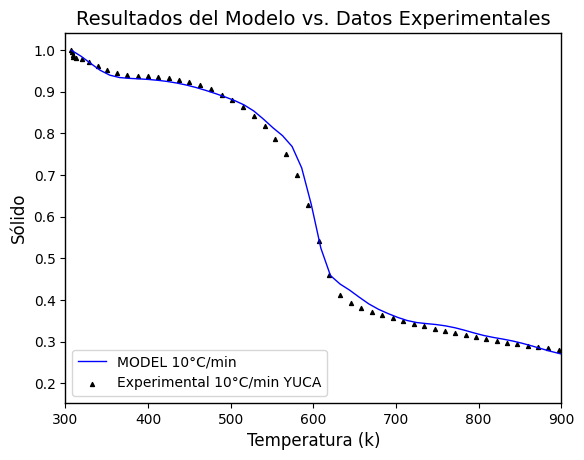

In [70]:

plt.figure(dpi=100)
#plt.figure(figsize=(6, 6))

# color del fondo
plt.gca().set_facecolor('none')

#bordes de la grafica
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

plt.xlim(300,900)
# Resultados del modelo
plt.plot(temperaturas,SOLIDO10, label='MODEL 10°C/min', linewidth=1, color='blue')

# TEMPERATURA_EXPERIMENTAL (Tomar solo un punto cada 300)
TEMPERATURA_EXPERIMENTAL10_subset = TEMPERATURA_EXPERIMENTAL10[::200]
FRACTION_EXPERIMENTAL10_subset = FRACTION_EXPERIMENTAL10[::200]

# Datos experimentales
plt.scatter(TEMPERATURA_EXPERIMENTAL10_subset, FRACTION_EXPERIMENTAL10_subset, label='Experimental 10°C/min YUCA', c='black', marker='^', s=8)

# Etiquetas
plt.xlabel('Temperatura (k)', fontsize=12)
plt.ylabel('Sólido', fontsize=12)
plt.legend(fontsize=12)
plt.gca().legend(loc='lower left')


# Título
plt.title('Resultados del Modelo vs. Datos Experimentales', fontsize=14)
plt.show()

In [37]:
np.shape(FRACTION_EXPERIMENTAL10_subset)
np.shape(SOLIDO10)

(80,)

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(FRACTION_EXPERIMENTAL10_subset, SOLIDO10)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 0.0015057117407953394


In [ ]:

import matplotlib.pyplot as plt

# Lista de etiquetas para las variables
etiquetas = ['CELL', 'HCE', 'LIGH', 'LIGO', 'LIGC', 'TGL', 'TANN', 'AGUA', 'CELLA', 'HCE1', 'HCE2', 'LIGCC', 'LIGOH', 'LIG', 'ITANN', 'G_CO2', 'G_CO', 'G_CH3OH', 'G_COH2_L', 'G_C2H6', 'G_CH4', 'G_C2H4', 'G_C6H5OH', 'G_COH2_S', 'G_H2', 'CH2OHCH2CHO', 'CH2OHCHO', 'CHOCHO', 'CH3CHO', 'C6H6O3', 'C2H5CHO', 'CH3OH', 'CH2O', 'CO', 'CO2', 'H2', 'HCOOH', 'CH4', 'CHAR', 'C6H10O5', 'C5H8O4', 'C2H4', 'CH3CO2H', 'C2H5OH', 'C2H6', 'C6H5OCH3', 'VAINILLIN', 'C24H28O4', 'C2H3CHO', 'U2ME12', 'MLINO', 'C6H5OH', 'C5H4O2', 'C7H8O', 'H2O']

# Crear una gráfica para cada variable en función del tiempo
for i in range(len(etiquetas)):
    plt.figure(figsize=(5, 3))
    plt.plot(temperaturas, sol[:, i])
    plt.title(f'Gráfica de {etiquetas[i]}')
    plt.xlabel('Temperatura')
    plt.ylabel(etiquetas[i])
    plt.grid(True)
    plt.show()

**TALLO DE MAIZ**

In [40]:
# Definir las constantes iniciales
T = 273 + 34.49  # Temperatura inicial


R = 1.9872  # kcal/(kmol*K)

# Inicializar las listas de A y k



#PRUEBA Y ERROR
MAIZ_A_values = [4e16, 6e6, 11*T, 10e3, 1e11, 2e16, 1.25e11, 2*T, 3e-4*T, 2e4, 6.7e10, 3.3e7, 1e10, 1e4, 15e9, 5*T, 0.1*T, 1.5e9, 7e12, 2e2, 3e4, 6e12, 5e12, 2e12, 6e16, 1e16, 1e11, 1e11, 6e11, 1e11, 1e11, 8*T]
MAIZ_E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]



#MASA
MAIZ_CELULOSA      = 0.3721
MAIZ_HEMICELULOSA  = 0.2022
MAIZ_LIGNINAC      = 0.0285
MAIZ_LIGNINAO      = 0.0271
MAIZ_LIGNINAH      = 0.0323
MAIZ_TRIGLICERIDOS = 0.0
MAIZ_TANINOS       = 0.2179
MAIZ_ASH           = 0.0547
MAIZ_HUMEDAD       = 0.0651

# Moles
MAIZ_CELULOSA      = CELULOSA/162.13712
MAIZ_HEMICELULOSA  = HEMICELULOSA/132.11171
MAIZ_LIGNINAH      = LIGNINAH/436.43932
MAIZ_LIGNINAO      = LIGNINAO/422.37596194
MAIZ_LIGNINAC      = LIGNINAC/258.26030179
MAIZ_TRIGLICERIDOS = TRIGLICERIDOS/897.36679
MAIZ_TANINOS       = TANINOS/304.24249
MAIZ_HUMEDAD       = HUMEDAD/18.01534


MAIZ_temperaturas = []

# Definir el sistema de ecuaciones diferenciales
def sistema(y, t, T):
    T = 273 + 20 + (t / 60) * 10  # Aumentar la temperatura en 10 unidades por minuto
    k_values = [A * np.exp(-E / (R * T)) for A, E in zip(MAIZ_A_values, MAIZ_E_values)]

## revisar composición de la biomasa

    CELL, HCE, LIGH, LIGO, LIGC, TGL, TANN, AGUA, CELLA, HCE1, HCE2, LIGCC, LIGOH, LIG, ITANN, G_CO2, G_CO, G_CH3OH, G_COH2_L, G_C2H6, G_CH4, G_C2H4, G_C6H5OH, G_COH2_S, G_H2, CH2OHCH2CHO, CH2OHCHO, CHOCHO, CH3CHO, C6H6O3, C2H5CHO, CH3OH, CH2O, CO, CO2, H2, HCOOH, CH4, CHAR, C6H10O5, C5H8O4, C2H4, CH3CO2H, C2H5OH, C2H6, C6H5OCH3, VAINILLIN, C24H28O4, C2H3CHO, U2ME12, MLINO, C6H5OH, C5H4O2, C7H8O, H2O = y

    dydt = [
        -(k_values[0] + k_values[3])*CELL,            #CELL
        -(k_values[5])*HCE,                           #HCE
        -(k_values[10])*LIGH,                         #LIGH
        -(k_values[11])*LIGO,                         #LIGO
        -(k_values[12])*LIGC,                         #LIGC
        -(k_values[18])*TGL,                          #TGL
        -(k_values[19])*TANN,                         #TANN
        -(k_values[31])*AGUA,                         #AGUA (HUMEDAD DE LA BIOMASA)
        (k_values[0])*CELL-CELLA*k_values[1]-CELLA*k_values[2],                       #CELLA
        (k_values[5])*HCE*0.88-HCE1*k_values[7],                                      #HCE1
        (k_values[5])*HCE*0.12-HCE2*(k_values[8]+k_values[9]),                        #HCE2
        (k_values[12])*LIGC*0.35-(k_values[13])*LIGCC,                                #LIGCC
        (k_values[10])*LIGH+(k_values[11])*LIGO-LIGOH*(k_values[14]),                 #LIGOH
        (k_values[14])*LIGOH*0.9-(k_values[15])*LIG-(k_values[16])*LIG-(k_values[17])*LIG,     #LIG
        (k_values[19])*TANN-(k_values[20])*ITANN,                                              #ITANN
        0.51*HCE1*(k_values[8])-G_CO2*(k_values[21]),                  #G_CO2
        0.05*CELLA*(k_values[1])+0.25*CELL*(k_values[3])+0.01*HCE1*(k_values[8])+0.4*LIGCC*(k_values[13])+0.6*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+TANN*(k_values[19])-G_CO*(k_values[22]),  #G_CO
        0.105*HCE2*(k_values[9])+0.3*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH3OH*(k_values[23]),              #G{CH3OH}
        0.05*CELLA*(k_values[1])+0.18*CELL*(k_values[3])+0.43*HCE1*(k_values[8])+0.18*HCE2*(k_values[9])+0.17*LIGC*(k_values[12])+0.45*LIGOH*(k_values[14])+1.25*LIG*(k_values[16])+0.55*ITANN*(k_values[20])-G_COH2_L*(k_values[24]), #G{COH2}LOOSE
        0.2*HCE1*(k_values[8])+0.2*HCE2*(k_values[9])+0.2*LIGC*(k_values[12])+0.15*LIGOH*(k_values[14])-G_C2H6*(k_values[25]),                  #G{C2H6}
        0.325*HCE1*(k_values[8])+0.05*HCE2*(k_values[9])+0.36*LIGC*(k_values[12])+0.25*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH4*(k_values[26]),                         #G{CH4}
        0.075*HCE1*(k_values[8])+0.1*HCE2*(k_values[9])+0.1*LIGOH*(k_values[14])+0.5*LIG*(k_values[16])-G_C2H4*(k_values[27]),                                                          #G{C2H4}
        0.15*TANN*(k_values[19])-G_C6H5OH*(k_values[28]),                                                              #G{C6H5OH}
        0.12*CELL*(k_values[3])+0.37*HCE1*(k_values[8])+0.78*HCE2*(k_values[9])+0.4*LIGC*(k_values[12])+0.4*LIGOH*(k_values[14])+0.65*LIG*(k_values[16])+0.45*ITANN*(k_values[20])-G_COH2_S*(k_values[29]),    #G{COH2}STIFF
        0.1*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.05*HCE1*(k_values[8])+0.21*HCE2*(k_values[9])+0.1*LIGC*(k_values[12])+0.1*LIG*(k_values[16])-G_H2*(k_values[30]),                    #G{H2}
        0.05*CELLA*(k_values[1])+0.06*HCE1*(k_values[7]),                                                             #CH2OHCH2CHO
        0.4*CELLA*(k_values[1])+0.035*HCE2*(k_values[9])+0.2*LIGH*(k_values[10])+0.35*LIGCC*(k_values[13]),           #CH2OHCHO
        0.03*CELLA*(k_values[1])+0.1*HCE1*(k_values[7]),                                        #CHOCHO
        0.17*CELLA*(k_values[1])+0.3*LIG*(k_values[15]),                                        #CH3CHO
        0.25*CELLA*(k_values[1])+0.13*HCE1*(k_values[7]),                                       #C6H6O3
        0.35*CELLA*(k_values[1])+0.5*LIGH*(k_values[10]),                                       #C2H5CHO
        0.2*CELLA*(k_values[1])+0.6*LIGOH*(k_values[14])+G_CH3OH*(k_values[23])+0.4*LIG*(k_values[17]),                             #CH3OH
        0.15*CELLA*(k_values[1])+0.4*HCE1*(k_values[8])+0.22*LIGC*(k_values[12])+0.4*LIG*(k_values[16])+0.4*LIG*(k_values[17]),     #CH2O
        0.49*CELLA*(k_values[1])+0.49*HCE1*(k_values[8])+0.3*HCE2*(k_values[9])+0.1*LIGH*(k_values[10])+0.21*LIGC*(k_values[12])+1.15*LIGCC*(k_values[13])+0.65*LIGOH*(k_values[14])+0.6*LIG*(k_values[15])+0.3*LIG*(k_values[16])+2.6*LIG*(k_values[17])+2*ITANN*(k_values[20])+G_CO*(k_values[22])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29]), #CO
        0.43*CELLA*(k_values[1])+0.09*HCE1*(k_values[7])+0.39*HCE1*(k_values[8])+0.5125*HCE2*(k_values[9])+LIGO*(k_values[11])+0.1*LIGC*(k_values[12])+0.05*LIGOH*(k_values[14])+0.1*LIG*(k_values[16])+G_CO2*(k_values[21]),       #CO2
        0.13*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.02*HCE1*(k_values[7])+0.1*HCE1*(k_values[8])+0.7*LIGCC*(k_values[13])+0.5505*HCE2*(k_values[9])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29])+G_H2*(k_values[30]),                       #H2
        0.02*CELLA*(k_values[1])+0.05*HCE1*(k_values[8])+0.0175*HCE2*(k_values[9])+0.05*LIGOH*(k_values[14]),                       #HCOOH
        0.05*CELLA*(k_values[1])+0.1*HCE1*(k_values[7])+0.3*HCE1*(k_values[8])+0.1895*HCE2*(k_values[9])+0.45*LIGCC*(k_values[13])+0.1*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+G_CH4*(k_values[26])+0.6*LIG*(k_values[17]),       #CH4
        0.66*CELLA*(k_values[1])+5.45*CELL*(k_values[3])+0.1*HCE1*(k_values[7])+0.975*HCE1*(k_values[8])+0.7125*HCE2*(k_values[9])+5.85*LIGC*(k_values[12])+6.8*LIGCC*(k_values[13])+4.25*LIGOH*(k_values[14])+0.1*LIG*(k_values[15])+6.1*LIG*(k_values[16])+4.5*LIG*(k_values[17])+5*ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29]),    #CHAR
        CELLA*(k_values[2])+0.25*HCE1*(k_values[7]),                                            #C6H10O5
        0.25*HCE1*(k_values[7]),                                                                #C5H8O4
        0.1*HCE1*(k_values[8])+0.4*LIGH*(k_values[10])+0.27*LIGC*(k_values[12])+0.3*LIGCC*(k_values[13])+0.5*LIG*(k_values[15])+0.75*LIG*(k_values[17])+G_C2H4*(k_values[27]),          #C2H4
        0.105*HCE2*(k_values[9]),                                                               #CH3CO2H
        0.049*HCE2*(k_values[9]),                                                               #C2H5OH
        0.1*LIGH*(k_values[10])+0.4*LIGCC*(k_values[13])+0.5*LIG*(k_values[17])+G_C2H6*(k_values[25]),    #C2H6
        0.1*LIGC*(k_values[12])+0.15*LIGCC*(k_values[13])+0.1*LIG*(k_values[15]),                         #C6H5OCH3
        0.1*LIGC*(k_values[12])+0.25*LIGCC*(k_values[13])+LIG*(k_values[15]),                             #VAINILLIN
        0.025*LIGOH*(k_values[14]),                                                                       #C24H28O4
        0.1*LIGOH*(k_values[14])+TGL*(k_values[18]),                                                      #C2H3CHO
        0.5*TGL*(k_values[18]),                                                                           #U2ME12
        2.5*TGL*(k_values[18]),                                                                           #MLINO
        0.85*TANN*(k_values[19])+G_C6H5OH*(k_values[28]),                                                 #C6H5OH
        0.16*HCE1*(k_values[7])+0.145*HCE2*(k_values[9]),                                                 #C5H4O2
        0.15*LIGCC*(k_values[13]),                                                                        #C7H8O
        0.93*CELLA*(k_values[1])+4.45*CELL*(k_values[3])+1.54*HCE1*(k_values[7])+1.4*HCE1*(k_values[8])+1.056*HCE2*(k_values[9])+LIGC*(k_values[12])+0.7*LIGCC*(k_values[13])+LIGOH*(k_values[14])+0.6*LIG*(k_values[16])+0.6*LIG*(k_values[17])+TANN*(k_values[19])+ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29])+AGUA*(k_values[31])    #H2O
    ]
    return dydt


# Condiciones iniciales
y0 = [CELULOSA, HEMICELULOSA, LIGNINAH, LIGNINAO, LIGNINAC, TRIGLICERIDOS, TANINOS, HUMEDAD, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0]

# Intervalo de tiempo
MAIZ_t_eval = np.linspace(0, 5500, 78)

# Iterar a través de t_eval para calcular las temperaturas en cada paso de tiempo
for t in MAIZ_t_eval:
    # Calcular la temperatura en función del tiempo (aquí puedes actualizar la lógica según tu necesidad)
    T = 273 + 34.49 + (t / 60) * 10
    MAIZ_temperaturas.append(T)

# Resol1ver el sistema de ecuaciones diferenciales usando odeint y pasar T como argumento adicional
sol1 = odeint(sistema, y0, MAIZ_t_eval, args=(MAIZ_temperaturas,))


MAIZ_CELL        = sol1[:, 0]*162.13712
MAIZ_HCE         = sol1[:, 1]*132.11171
MAIZ_LIGH        = sol1[:, 2]*436.43932
MAIZ_LIGO        = sol1[:, 3]*422.37596194
MAIZ_LIGC        = sol1[:, 4]*258.26030179
MAIZ_TGL         = sol1[:, 5]*897.36679
MAIZ_TANN        = sol1[:, 6]*304.24249
MAIZ_AGUA        = sol1[:, 7]*18.01534
MAIZ_CELLA       = sol1[:, 8]*162.1394
MAIZ_HCE1        = sol1[:, 9]*132.11171
MAIZ_HCE2        = sol1[:, 10]*132.11171
MAIZ_LIGCC       = sol1[:, 11]*258.27076
MAIZ_LIGOH       = sol1[:, 12]*378.37348
MAIZ_LIG         = sol1[:, 13]*208.21108
MAIZ_ITANN       = sol1[:, 14]*164.11004
MAIZ_G_CO2       = sol1[:, 15]*44.00887
MAIZ_G_CO        = sol1[:, 16]*28.00947
MAIZ_G_CH3OH     = sol1[:, 17]*32.04135
MAIZ_G_COH2_L    = sol1[:, 18]*30.02541
MAIZ_G_C2H6      = sol1[:, 19]*30.06796
MAIZ_G_CH4       = sol1[:, 20]*16.04195
MAIZ_G_C2H4      = sol1[:, 21]*28.05202
MAIZ_G_C6H5OH    = sol1[:, 22]*94.10764
MAIZ_G_COH2_S    = sol1[:, 23]*30.02541
MAIZ_G_H2        = sol1[:, 24]*2.01594
MAIZ_CH2OHCH2CHO = sol1[:, 25]*74.07683
MAIZ_CH2OHCHO    = sol1[:, 26]*60.05082
MAIZ_CHOCHO      = sol1[:, 27]*58.03488
MAIZ_CH3CHO      = sol1[:, 28]*44.05142
MAIZ_C6H6O3      = sol1[:, 29]*126.10644
MAIZ_C2H5CHO     = sol1[:, 30]*58.07743
MAIZ_CH3OH       = sol1[:, 31]*32.04135
MAIZ_CH2O        = sol1[:, 32]*60.05082
MAIZ_CO          = sol1[:, 33]*28.00947
MAIZ_CO2         = sol1[:, 34]*44.00887
MAIZ_H2          = sol1[:, 35]*2.01594
MAIZ_HCOOH       = sol1[:, 36]*46.02481
MAIZ_CH4         = sol1[:, 37]*16.04195
MAIZ_CHAR        = sol1[:, 38]*12.01007
MAIZ_C6H10O5     = sol1[:, 39]*162.13712
MAIZ_C5H8O4      = sol1[:, 40]*132.11171
MAIZ_C2H4        = sol1[:, 41]*28.05202
MAIZ_CH3CO2H     = sol1[:, 42]*60.05082
MAIZ_C2H5OH      = sol1[:, 43]*46.06736
MAIZ_C2H6        = sol1[:, 44]*30.06796
MAIZ_C6H5OCH3    = sol1[:, 45]*108.13365
MAIZ_VAINILLIN   = sol1[:, 46]*152.14252
MAIZ_C24H28O4    = sol1[:, 47]*380.46244
MAIZ_C2H3CHO     = sol1[:, 48]*56.06149
MAIZ_U2ME12      = sol1[:, 49]*210.30505
MAIZ_MLINO       = sol1[:, 50]*294.46111
MAIZ_C6H5OH      = sol1[:, 51]*94.10764
MAIZ_C5H4O2      = sol1[:, 52]*96.08103
MAIZ_C7H8O       = sol1[:, 53]*108.13365
MAIZ_H2O         = sol1[:, 54]*18.01534
MAIZ_SOLIDO = MAIZ_CELL+MAIZ_HCE+MAIZ_LIGH+MAIZ_LIGO+MAIZ_LIGC+MAIZ_HCE1+MAIZ_HCE2+MAIZ_LIGCC+MAIZ_LIGOH+MAIZ_LIG+MAIZ_TANN+MAIZ_TGL+MAIZ_CELLA+MAIZ_CHAR+MAIZ_AGUA+MAIZ_ASH+MAIZ_ITANN+MAIZ_G_CO2+MAIZ_G_CO+ MAIZ_G_CH3OH+ MAIZ_G_COH2_L +MAIZ_G_C2H6+ MAIZ_G_CH4+ MAIZ_G_C2H4+ MAIZ_G_C6H5OH+ MAIZ_G_COH2_S+ MAIZ_G_H2



In [ ]:
import matplotlib.pyplot as plt

# Lista de etiquetas para las variables
etiquetas1 = ['CELL', 'HCE', 'LIGH', 'LIGO', 'LIGC', 'TGL', 'TANN', 'AGUA', 'CELLA', 'HCE1', 'HCE2', 'LIGCC', 'LIGOH', 'LIG', 'ITANN', 'G_CO2', 'G_CO', 'G_CH3OH', 'G_COH2_L', 'G_C2H6', 'G_CH4', 'G_C2H4', 'G_C6H5OH', 'G_COH2_S', 'G_H2', 'CH2OHCH2CHO', 'CH2OHCHO', 'CHOCHO', 'CH3CHO', 'C6H6O3', 'C2H5CHO', 'CH3OH', 'CH2O', 'CO', 'CO2', 'H2', 'HCOOH', 'CH4', 'CHAR', 'C6H10O5', 'C5H8O4', 'C2H4', 'CH3CO2H', 'C2H5OH', 'C2H6', 'C6H5OCH3', 'VAINILLIN', 'C24H28O4', 'C2H3CHO', 'U2ME12', 'MLINO', 'C6H5OH', 'C5H4O2', 'C7H8O', 'H2O']

# Crear una gráfica para cada variable en función del tiempo
for i in range(len(etiquetas)):
    plt.figure(figsize=(5, 5))
    plt.plot(MAIZ_temperaturas, sol1[:,i])
    plt.title(f'Gráfica de {etiquetas1[i]}')
    plt.xlabel('Temperatura')
    plt.ylabel(etiquetas1[i])
    plt.grid(True)
    plt.show()

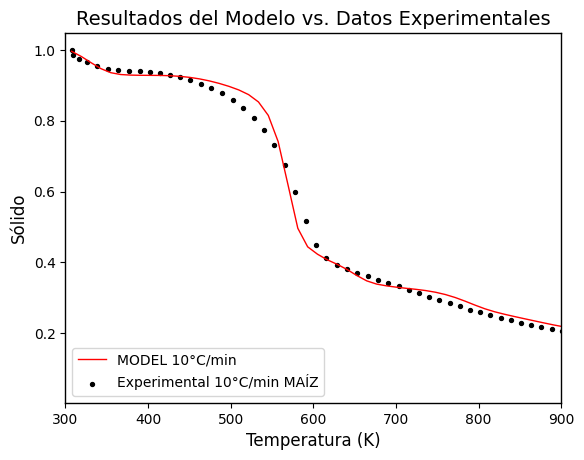

In [71]:

plt.figure(dpi=100)
#plt.figure(figsize=(6, 6))

# color del fondo
plt.gca().set_facecolor('none')

#bordes de la grafica
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Resultados del modelo
plt.plot(MAIZ_temperaturas,MAIZ_SOLIDO, label='MODEL 10°C/min', linewidth=1, color='red')

# TEMPERATURA_EXPERIMENTAL (Tomar solo un punto cada 300)

MAIZ_TEMPERATURA_EXPERIMENTAL10_subset = MAIZ_TEMPERATURA_EXPERIMENTAL10[::600]
MAIZ_FRACTION_EXPERIMENTAL10_subset = MAIZ_FRACTION_EXPERIMENTAL10[::600]

# Datos experimentales
#plt.scatter(TEMPERATURA_EXPERIMENTAL10_subset, FRACTION_EXPERIMENTAL10_subset, label='Experimental 10°C/min YUCA', c='black', marker='^', s=8)
plt.scatter(MAIZ_TEMPERATURA_EXPERIMENTAL10_subset, MAIZ_FRACTION_EXPERIMENTAL10_subset, label='Experimental 10°C/min MAÍZ', c='black', marker='o', s=8)

plt.xlim(300,900)
# Etiquetas
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Sólido', fontsize=12)
plt.legend(fontsize=12)
plt.gca().legend(loc='lower left')

# Título
plt.title('Resultados del Modelo vs. Datos Experimentales', fontsize=14)
plt.show()


In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(MAIZ_FRACTION_EXPERIMENTAL10_subset, MAIZ_SOLIDO)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 0.002089079635889743


**M1:** MEZCLA 1 (80% TALLO DE MAÍZ - 20% TALLO DE YUCA) M1

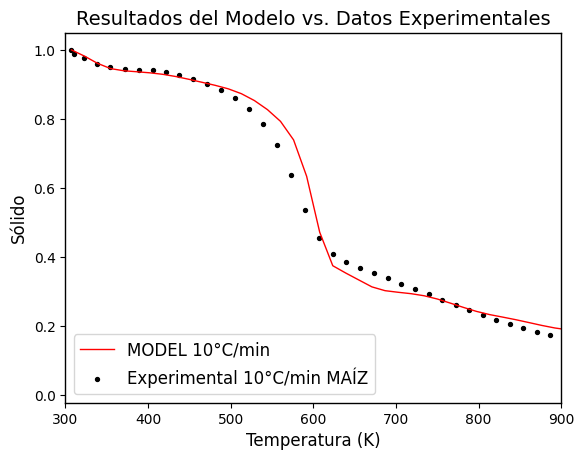

In [45]:
# Definir las constantes iniciales
T = 273 + 34.49  # Temperatura inicial


R = 1.9872  # kcal/(kmol*K)

M1_A_values = [3.5e15, 3e6, 11*T, 10e3, 1.25e11, 2e16, 1.25e11, 3*T, 2e-4*T, 7e6, 6.7e12, 3.3e8, 1e11, 1e4, 1.5e8, 8*T, 16*T, 1.5e9, 7e12, 6e2, 9e3, 1e6, 5e12, 2e12, 6e12, 1e11, 1e18, 1e18, 5e13, 1e18, 1e9, 8*T]
M1_E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]


#MASA
M1_CELULOSA      = 0.3780
M1_HEMICELULOSA  = 0.2054
M1_LIGNINAC      = 0.0393
M1_LIGNINAO      = 0.0816
M1_LIGNINAH      = 0.0029
M1_TRIGLICERIDOS = 0.0
M1_TANINOS       = 0.1526
M1_ASH           = 0.0820
M1_HUMEDAD       = 0.0582

# Moles
M1_CELULOSA      = M1_CELULOSA/162.13712
M1_HEMICELULOSA  = M1_HEMICELULOSA/132.11171
M1_LIGNINAC      = M1_LIGNINAC/258.26030179
M1_LIGNINAO      = M1_LIGNINAO/422.37596194
M1_LIGNINAH      = M1_LIGNINAH/436.43932
M1_TRIGLICERIDOS = M1_TRIGLICERIDOS/897.36679
M1_TANINOS       = M1_TANINOS/304.24249
M1_HUMEDAD       = M1_HUMEDAD/18.01534


M1_temperaturas = []

# Definir el sistema de ecuaciones diferenciales
def sistema_M1(y, t, T):
    T = 273 + 20 + (t / 60) * 10  # Aumentar la temperatura en 10 unidades por minuto
    k_values = [A * np.exp(-E / (R * T)) for A, E in zip(M1_A_values, M1_E_values)]

## revisar composición de la biomasa

    CELL, HCE, LIGH, LIGO, LIGC, TGL, TANN, AGUA, CELLA, HCE1, HCE2, LIGCC, LIGOH, LIG, ITANN, G_CO2, G_CO, G_CH3OH, G_COH2_L, G_C2H6, G_CH4, G_C2H4, G_C6H5OH, G_COH2_S, G_H2, CH2OHCH2CHO, CH2OHCHO, CHOCHO, CH3CHO, C6H6O3, C2H5CHO, CH3OH, CH2O, CO, CO2, H2, HCOOH, CH4, CHAR, C6H10O5, C5H8O4, C2H4, CH3CO2H, C2H5OH, C2H6, C6H5OCH3, VAINILLIN, C24H28O4, C2H3CHO, U2ME12, MLINO, C6H5OH, C5H4O2, C7H8O, H2O = y

    dydt = [
        -(k_values[0] + k_values[3])*CELL,            #CELL
        -(k_values[5])*HCE,                           #HCE
        -(k_values[10])*LIGH,                         #LIGH
        -(k_values[11])*LIGO,                         #LIGO
        -(k_values[12])*LIGC,                         #LIGC
        -(k_values[18])*TGL,                          #TGL
        -(k_values[19])*TANN,                         #TANN
        -(k_values[31])*AGUA,                         #AGUA (HUMEDAD DE LA BIOMASA)
        (k_values[0])*CELL-CELLA*k_values[1]-CELLA*k_values[2],                       #CELLA
        (k_values[5])*HCE*0.80-HCE1*k_values[7],                                      #HCE1
        (k_values[5])*HCE*0.20-HCE2*(k_values[8]+k_values[9]),                        #HCE2
        (k_values[12])*LIGC*0.35-(k_values[13])*LIGCC,                                #LIGCC
        (k_values[10])*LIGH+(k_values[11])*LIGO-LIGOH*(k_values[14]),                 #LIGOH
        (k_values[14])*LIGOH*0.9-(k_values[15])*LIG-(k_values[16])*LIG-(k_values[17])*LIG,     #LIG
        (k_values[19])*TANN-(k_values[20])*ITANN,                                              #ITANN
        0.51*HCE1*(k_values[8])+0.45*HCE2*(k_values[9])-G_CO2*(k_values[21]),                  #G_CO2
        0.05*CELLA*(k_values[1])+0.25*CELL*(k_values[3])+0.01*HCE1*(k_values[8])+0.4*LIGCC*(k_values[13])+0.6*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+TANN*(k_values[19])-G_CO*(k_values[22]),  #G_CO
        0.105*HCE2*(k_values[9])+0.3*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH3OH*(k_values[23]),              #G{CH3OH}
        0.05*CELLA*(k_values[1])+0.18*CELL*(k_values[3])+0.43*HCE1*(k_values[8])+0.18*HCE2*(k_values[9])+0.17*LIGC*(k_values[12])+0.45*LIGOH*(k_values[14])+1.25*LIG*(k_values[16])+0.55*ITANN*(k_values[20])-G_COH2_L*(k_values[24]), #G{COH2}LOOSE
        0.2*HCE1*(k_values[8])+0.2*HCE2*(k_values[9])+0.2*LIGC*(k_values[12])+0.15*LIGOH*(k_values[14])-G_C2H6*(k_values[25]),                  #G{C2H6}
        0.325*HCE1*(k_values[8])+0.05*HCE2*(k_values[9])+0.36*LIGC*(k_values[12])+0.25*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH4*(k_values[26]),                         #G{CH4}
        0.075*HCE1*(k_values[8])+0.1*HCE2*(k_values[9])+0.1*LIGOH*(k_values[14])+0.5*LIG*(k_values[16])-G_C2H4*(k_values[27]),                                                          #G{C2H4}
        0.15*TANN*(k_values[19])-G_C6H5OH*(k_values[28]),                                                              #G{C6H5OH}
        0.12*CELL*(k_values[3])+0.37*HCE1*(k_values[8])+0.78*HCE2*(k_values[9])+0.4*LIGC*(k_values[12])+0.4*LIGOH*(k_values[14])+0.65*LIG*(k_values[16])+0.45*ITANN*(k_values[20])-G_COH2_S*(k_values[29]),    #G{COH2}STIFF
        0.1*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.05*HCE1*(k_values[8])+0.21*HCE2*(k_values[9])+0.1*LIGC*(k_values[12])+0.1*LIG*(k_values[16])-G_H2*(k_values[30]),                    #G{H2}
        0.05*CELLA*(k_values[1])+0.06*HCE1*(k_values[7]),                                                             #CH2OHCH2CHO
        0.4*CELLA*(k_values[1])+0.035*HCE2*(k_values[9])+0.2*LIGH*(k_values[10])+0.35*LIGCC*(k_values[13]),           #CH2OHCHO
        0.03*CELLA*(k_values[1])+0.1*HCE1*(k_values[7]),                                        #CHOCHO
        0.17*CELLA*(k_values[1])+0.3*LIG*(k_values[15]),                                        #CH3CHO
        0.25*CELLA*(k_values[1])+0.13*HCE1*(k_values[7]),                                       #C6H6O3
        0.35*CELLA*(k_values[1])+0.5*LIGH*(k_values[10]),                                       #C2H5CHO
        0.2*CELLA*(k_values[1])+0.6*LIGOH*(k_values[14])+G_CH3OH*(k_values[23])+0.4*LIG*(k_values[17]),                             #CH3OH
        0.15*CELLA*(k_values[1])+0.4*HCE1*(k_values[8])+0.22*LIGC*(k_values[12])+0.4*LIG*(k_values[16])+0.4*LIG*(k_values[17]),     #CH2O
        0.49*CELLA*(k_values[1])+0.49*HCE1*(k_values[8])+0.3*HCE2*(k_values[9])+0.1*LIGH*(k_values[10])+0.21*LIGC*(k_values[12])+1.15*LIGCC*(k_values[13])+0.65*LIGOH*(k_values[14])+0.6*LIG*(k_values[15])+0.3*LIG*(k_values[16])+2.6*LIG*(k_values[17])+2*ITANN*(k_values[20])+G_CO*(k_values[22])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29]), #CO
        0.43*CELLA*(k_values[1])+0.09*HCE1*(k_values[7])+0.39*HCE1*(k_values[8])+0.5125*HCE2*(k_values[9])+LIGO*(k_values[11])+0.1*LIGC*(k_values[12])+0.05*LIGOH*(k_values[14])+0.1*LIG*(k_values[16])+G_CO2*(k_values[21]),       #CO2
        0.13*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.02*HCE1*(k_values[7])+0.1*HCE1*(k_values[8])+0.7*LIGCC*(k_values[13])+0.5505*HCE2*(k_values[9])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29])+G_H2*(k_values[30]),                       #H2
        0.02*CELLA*(k_values[1])+0.05*HCE1*(k_values[8])+0.0175*HCE2*(k_values[9])+0.05*LIGOH*(k_values[14]),                       #HCOOH
        0.05*CELLA*(k_values[1])+0.1*HCE1*(k_values[7])+0.3*HCE1*(k_values[8])+0.1895*HCE2*(k_values[9])+0.45*LIGCC*(k_values[13])+0.1*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+G_CH4*(k_values[26])+0.6*LIG*(k_values[17]),       #CH4
        0.66*CELLA*(k_values[1])+5.45*CELL*(k_values[3])+0.1*HCE1*(k_values[7])+0.975*HCE1*(k_values[8])+0.7125*HCE2*(k_values[9])+5.85*LIGC*(k_values[12])+6.8*LIGCC*(k_values[13])+4.25*LIGOH*(k_values[14])+0.1*LIG*(k_values[15])+6.1*LIG*(k_values[16])+4.5*LIG*(k_values[17])+5*ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29]),    #CHAR
        CELLA*(k_values[2])+0.25*HCE1*(k_values[7]),                                            #C6H10O5
        0.25*HCE1*(k_values[7]),                                                                #C5H8O4
        0.1*HCE1*(k_values[8])+0.4*LIGH*(k_values[10])+0.27*LIGC*(k_values[12])+0.3*LIGCC*(k_values[13])+0.5*LIG*(k_values[15])+0.75*LIG*(k_values[17])+G_C2H4*(k_values[27]),          #C2H4
        0.105*HCE2*(k_values[9]),                                                               #CH3CO2H
        0.049*HCE2*(k_values[9]),                                                               #C2H5OH
        0.1*LIGH*(k_values[10])+0.4*LIGCC*(k_values[13])+0.5*LIG*(k_values[17])+G_C2H6*(k_values[25]),    #C2H6
        0.1*LIGC*(k_values[12])+0.15*LIGCC*(k_values[13])+0.1*LIG*(k_values[15]),                         #C6H5OCH3
        0.1*LIGC*(k_values[12])+0.25*LIGCC*(k_values[13])+LIG*(k_values[15]),                             #VAINILLIN
        0.025*LIGOH*(k_values[14]),                                                                       #C24H28O4
        0.1*LIGOH*(k_values[14])+TGL*(k_values[18]),                                                      #C2H3CHO
        0.5*TGL*(k_values[18]),                                                                           #U2ME12
        2.5*TGL*(k_values[18]),                                                                           #MLINO
        0.85*TANN*(k_values[19])+G_C6H5OH*(k_values[28]),                                                 #C6H5OH
        0.16*HCE1*(k_values[7])+0.145*HCE2*(k_values[9]),                                                 #C5H4O2
        0.15*LIGCC*(k_values[13]),                                                                        #C7H8O
        0.93*CELLA*(k_values[1])+4.45*CELL*(k_values[3])+1.54*HCE1*(k_values[7])+1.4*HCE1*(k_values[8])+1.056*HCE2*(k_values[9])+LIGC*(k_values[12])+0.7*LIGCC*(k_values[13])+LIGOH*(k_values[14])+0.6*LIG*(k_values[16])+0.6*LIG*(k_values[17])+TANN*(k_values[19])+ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29])+AGUA*(k_values[31])    #H2O
      ]
    return dydt


# Condiciones iniciales
y0_M1 = [M1_CELULOSA, M1_HEMICELULOSA, M1_LIGNINAH, M1_LIGNINAO, M1_LIGNINAC, M1_TRIGLICERIDOS, M1_TANINOS, M1_HUMEDAD, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0]

# Intervalo de tiempo
t_eval_M1 = np.linspace(0, 5500, 59)

# Iterar a través de t_eval para calcular las temperaturas en cada paso de tiempo
for t in t_eval_M1:
    # Calcular la temperatura en función del tiempo (aquí puedes actualizar la lógica según tu necesidad)
    T = 273 + 34.49 + (t / 60) * 10
    M1_temperaturas.append(T)

# Resol1ver el sistema de ecuaciones diferenciales usando odeint y pasar T como argumento adicional
sol2 = odeint(sistema_M1, y0_M1, t_eval_M1, args=(M1_temperaturas,))


M1_CELL        = sol2[:, 0]*162.13712
M1_HCE         = sol2[:, 1]*132.11171
M1_LIGH        = sol2[:, 2]*436.43932
M1_LIGO        = sol2[:, 3]*422.37596194
M1_LIGC        = sol2[:, 4]*258.26030179
M1_TGL         = sol2[:, 5]*897.36679
M1_TANN        = sol2[:, 6]*304.24249
M1_AGUA        = sol2[:, 7]*18.01534
M1_CELLA       = sol2[:, 8]*162.1394
M1_HCE1        = sol2[:, 9]*132.11171
M1_HCE2        = sol2[:, 10]*132.11171
M1_LIGCC       = sol2[:, 11]*258.27076
M1_LIGOH       = sol2[:, 12]*378.37348
M1_LIG         = sol2[:, 13]*208.21108
M1_ITANN       = sol2[:, 14]*164.11004
M1_G_CO2       = sol2[:, 15]*44.00887
M1_G_CO        = sol2[:, 16]*28.00947
M1_G_CH3OH     = sol2[:, 17]*32.04135
M1_G_COH2_L    = sol2[:, 18]*30.02541
M1_G_C2H6      = sol2[:, 19]*30.06796
M1_G_CH4       = sol2[:, 20]*16.04195
M1_G_C2H4      = sol2[:, 21]*28.05202
M1_G_C6H5OH    = sol2[:, 22]*94.10764
M1_G_COH2_S    = sol2[:, 23]*30.02541
M1_G_H2        = sol2[:, 24]*2.01594
M1_CH2OHCH2CHO = sol2[:, 25]*74.07683
M1_CH2OHCHO    = sol2[:, 26]*60.05082
M1_CHOCHO      = sol2[:, 27]*58.03488
M1_CH3CHO      = sol2[:, 28]*44.05142
M1_C6H6O3      = sol2[:, 29]*126.10644
M1_C2H5CHO     = sol2[:, 30]*58.07743
M1_CH3OH       = sol2[:, 31]*32.04135
M1_CH2O        = sol2[:, 32]*60.05082
M1_CO          = sol2[:, 33]*28.00947
M1_CO2         = sol2[:, 34]*44.00887
M1_H2          = sol2[:, 35]*2.01594
M1_HCOOH       = sol2[:, 36]*46.02481
M1_CH4         = sol2[:, 37]*16.04195
M1_CHAR        = sol2[:, 38]*12.01007
M1_C6H10O5     = sol2[:, 39]*162.13712
M1_C5H8O4      = sol2[:, 40]*132.11171
M1_C2H4        = sol2[:, 41]*28.05202
M1_CH3CO2H     = sol2[:, 42]*60.05082
M1_C2H5OH      = sol2[:, 43]*46.06736
M1_C2H6        = sol2[:, 44]*30.06796
M1_C6H5OCH3    = sol2[:, 45]*108.13365
M1_VAINILLIN   = sol2[:, 46]*152.14252
M1_C24H28O4    = sol2[:, 47]*380.46244
M1_C2H3CHO     = sol2[:, 48]*56.06149
M1_U2ME12      = sol2[:, 49]*210.30505
M1_MLINO       = sol2[:, 50]*294.46111
M1_C6H5OH      = sol2[:, 51]*94.10764
M1_C5H4O2      = sol2[:, 52]*96.08103
M1_C7H8O       = sol2[:, 53]*108.13365
M1_H2O         = sol2[:, 54]*18.01534
M1_SOLIDO = M1_CELL+M1_HCE+M1_LIGH+M1_LIGO+M1_LIGC+M1_HCE1+M1_HCE2+M1_LIGCC+M1_LIGOH+M1_LIG+M1_TANN+M1_TGL+M1_CELLA+M1_CHAR+M1_AGUA+M1_ASH+M1_ITANN+M1_G_CO2+M1_G_CO+ M1_G_CH3OH+ M1_G_COH2_L +M1_G_C2H6+ M1_G_CH4+ M1_G_C2H4+ M1_G_C6H5OH+ M1_G_COH2_S+ M1_G_H2



#M1_temperaturas_celsius10 = []
#for temperatura in temperaturas:
#    temperatura_celsius = temperatura - 273.15
#    temperaturas_celsius10.append(temperatura_celsius)

plt.figure(dpi=100)
#plt.figure(figsize=(6, 6))

# color del fondo
plt.gca().set_facecolor('none')

#bordes de la grafica
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Resultados del modelo
plt.xlim(300,900)
plt.plot(M1_temperaturas,M1_SOLIDO, label='MODEL 10°C/min', linewidth=1, color='red')

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 20% TALLO DE MAIZ 80%
M1_DATOS_EXPERIMENTALES10Cmin_subset = M1_TEMPERATURA_EXPERIMENTAL10[::800]
M1_FRACTION_EXPERIMENTAL10_subset = M1_FRACTION_EXPERIMENTAL10[::800]

# Datos experimentales

plt.scatter(M1_DATOS_EXPERIMENTALES10Cmin_subset, M1_FRACTION_EXPERIMENTAL10_subset, label='Experimental 10°C/min MAÍZ', c='black', marker='o', s=8)

# Etiquetas
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Sólido', fontsize=12)
plt.legend(fontsize=12)
plt.gca().legend(loc='lower left')


# Título
plt.title('Resultados del Modelo vs. Datos Experimentales', fontsize=14)
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(M1_FRACTION_EXPERIMENTAL10_subset, M1_SOLIDO)
print(f'Error cuadrático medio (MSE): {mse}')


Error cuadrático medio (MSE): 0.004931947105300235


In [ ]:

import matplotlib.pyplot as plt

# Lista de etiquetas para las variables
etiquetas = ['CELL', 'HCE', 'LIGH', 'LIGO', 'LIGC', 'TGL', 'TANN', 'AGUA', 'CELLA', 'HCE1', 'HCE2', 'LIGCC', 'LIGOH', 'LIG', 'ITANN', 'G_CO2', 'G_CO', 'G_CH3OH', 'G_COH2_L', 'G_C2H6', 'G_CH4', 'G_C2H4', 'G_C6H5OH', 'G_COH2_S', 'G_H2', 'CH2OHCH2CHO', 'CH2OHCHO', 'CHOCHO', 'CH3CHO', 'C6H6O3', 'C2H5CHO', 'CH3OH', 'CH2O', 'CO', 'CO2', 'H2', 'HCOOH', 'CH4', 'CHAR', 'C6H10O5', 'C5H8O4', 'C2H4', 'CH3CO2H', 'C2H5OH', 'C2H6', 'C6H5OCH3', 'VAINILLIN', 'C24H28O4', 'C2H3CHO', 'U2ME12', 'MLINO', 'C6H5OH', 'C5H4O2', 'C7H8O', 'H2O']

# Crear una gráfica para cada variable en función del tiempo
for i in range(len(etiquetas)):
    plt.figure(figsize=(5, 5))
    plt.plot(M1_temperaturas, sol2[:, i])
    plt.title(f'Gráfica de {etiquetas[i]}')
    plt.xlabel('Temperatura')
    plt.ylabel(etiquetas[i])
    plt.grid(True)
    plt.show()

**M2**: MEZCLA (50% RIZOMA DE YUCA - 50% TALLO DE MAÍZ)

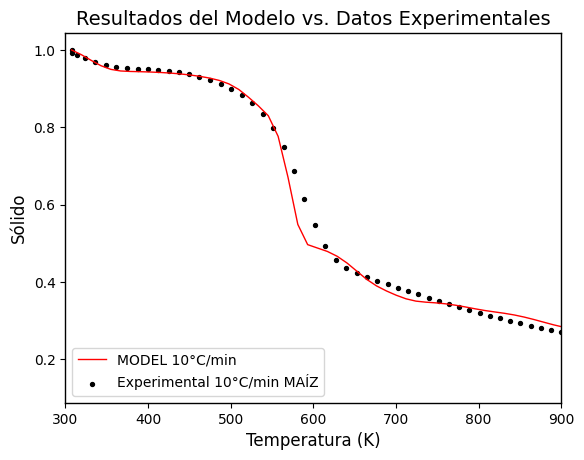

In [72]:
# Definir las constantes iniciales
T = 273 + 34.49  # Temperatura inicial

R = 1.9872  # kcal/(kmol*K)

M2_A_values = [3.5e16, 3e6, 3.3*T, 9e7, 1e10, 5e11, 1.25e11, 6.5*T, 3e-3*T, 7e9, 6.7e10, 3.3e7, 1e10, 1e4, 15e9, 20*T, 0.5*T, 1.5e9, 7e12, 2e2, 5e2, 1e6, 5e12, 2e12, 6e13, 1e11, 1e11, 1e11, 1.5e12, 1e8, 1e8, 8*T]
M2_E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]

#MASA
M2_CELULOSA      = 0.3776
M2_HEMICELULOSA  = 0.2052
M2_LIGNINAC      = 0.0497
M2_LIGNINAO      = 0.0117
M2_LIGNINAH      = 0.0985
M2_TRIGLICERIDOS = 0.0
M2_TANINOS       = 0.0939
M2_ASH           = 0.1084
M2_HUMEDAD       = 0.0550

# Moles
M2_CELULOSA      = M2_CELULOSA/162.13712
M2_HEMICELULOSA  = M2_HEMICELULOSA/132.11171
M2_LIGNINAC      = M2_LIGNINAC/258.26030179
M2_LIGNINAO      = M2_LIGNINAO/422.37596194
M2_LIGNINAH      = M2_LIGNINAH/436.43932
M2_TRIGLICERIDOS = M2_TRIGLICERIDOS/897.36679
M2_TANINOS       = M2_TANINOS/304.24249
M2_HUMEDAD       = M2_HUMEDAD/18.01534


M2_temperaturas = []

# Definir el sistema de ecuaciones diferenciales
def sistema_M1(y, t, T):
    T = 273 + 20 + (t / 60) * 10  # Aumentar la temperatura en 10 unidades por minuto
    k_values = [A * np.exp(-E / (R * T)) for A, E in zip(M2_A_values, M2_E_values)]

## revisar composición de la biomasa

    CELL, HCE, LIGH, LIGO, LIGC, TGL, TANN, AGUA, CELLA, HCE1, HCE2, LIGCC, LIGOH, LIG, ITANN, G_CO2, G_CO, G_CH3OH, G_COH2_L, G_C2H6, G_CH4, G_C2H4, G_C6H5OH, G_COH2_S, G_H2, CH2OHCH2CHO, CH2OHCHO, CHOCHO, CH3CHO, C6H6O3, C2H5CHO, CH3OH, CH2O, CO, CO2, H2, HCOOH, CH4, CHAR, C6H10O5, C5H8O4, C2H4, CH3CO2H, C2H5OH, C2H6, C6H5OCH3, VAINILLIN, C24H28O4, C2H3CHO, U2ME12, MLINO, C6H5OH, C5H4O2, C7H8O, H2O = y

    dydt = [
        -(k_values[0] + k_values[3])*CELL,            #CELL
        -(k_values[5])*HCE,                           #HCE
        -(k_values[10])*LIGH,                         #LIGH
        -(k_values[11])*LIGO,                         #LIGO
        -(k_values[12])*LIGC,                         #LIGC
        -(k_values[18])*TGL,                          #TGL
        -(k_values[19])*TANN,                         #TANN
        -(k_values[31])*AGUA,                         #AGUA (HUMEDAD DE LA BIOMASA)
        (k_values[0])*CELL-CELLA*k_values[1]-CELLA*k_values[2],                       #CELLA
        (k_values[5])*HCE*0.35-HCE1*k_values[7],                                      #HCE1
        (k_values[5])*HCE*0.65-HCE2*(k_values[8]+k_values[9]),                        #HCE2
        (k_values[12])*LIGC*0.35-(k_values[13])*LIGCC,                                #LIGCC
        (k_values[10])*LIGH+(k_values[11])*LIGO-LIGOH*(k_values[14]),                 #LIGOH
        (k_values[14])*LIGOH*0.9-(k_values[15])*LIG-(k_values[16])*LIG-(k_values[17])*LIG,     #LIG
        (k_values[19])*TANN-(k_values[20])*ITANN,                                              #ITANN
        0.51*HCE1*(k_values[8])-G_CO2*(k_values[21]),                  #G_CO2
        0.05*CELLA*(k_values[1])+0.25*CELL*(k_values[3])+0.01*HCE1*(k_values[8])+0.4*LIGCC*(k_values[13])+0.6*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+TANN*(k_values[19])-G_CO*(k_values[22]),  #G_CO
        0.105*HCE2*(k_values[9])+0.3*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH3OH*(k_values[23]),              #G{CH3OH}
        0.05*CELLA*(k_values[1])+0.18*CELL*(k_values[3])+0.43*HCE1*(k_values[8])+0.18*HCE2*(k_values[9])+0.17*LIGC*(k_values[12])+0.45*LIGOH*(k_values[14])+1.25*LIG*(k_values[16])+0.55*ITANN*(k_values[20])-G_COH2_L*(k_values[24]), #G{COH2}LOOSE
        0.2*HCE1*(k_values[8])+0.2*HCE2*(k_values[9])+0.2*LIGC*(k_values[12])+0.15*LIGOH*(k_values[14])-G_C2H6*(k_values[25]),                  #G{C2H6}
        0.325*HCE1*(k_values[8])+0.05*HCE2*(k_values[9])+0.36*LIGC*(k_values[12])+0.25*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH4*(k_values[26]),                         #G{CH4}
        0.075*HCE1*(k_values[8])+0.1*HCE2*(k_values[9])+0.1*LIGOH*(k_values[14])+0.5*LIG*(k_values[16])-G_C2H4*(k_values[27]),                                                          #G{C2H4}
        0.15*TANN*(k_values[19])-G_C6H5OH*(k_values[28]),                                                              #G{C6H5OH}
        0.12*CELL*(k_values[3])+0.37*HCE1*(k_values[8])+0.78*HCE2*(k_values[9])+0.4*LIGC*(k_values[12])+0.4*LIGOH*(k_values[14])+0.65*LIG*(k_values[16])+0.45*ITANN*(k_values[20])-G_COH2_S*(k_values[29]),    #G{COH2}STIFF
        0.1*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.05*HCE1*(k_values[8])+0.21*HCE2*(k_values[9])+0.1*LIGC*(k_values[12])+0.1*LIG*(k_values[16])-G_H2*(k_values[30]),                    #G{H2}
        0.05*CELLA*(k_values[1])+0.06*HCE1*(k_values[7]),                                                             #CH2OHCH2CHO
        0.4*CELLA*(k_values[1])+0.035*HCE2*(k_values[9])+0.2*LIGH*(k_values[10])+0.35*LIGCC*(k_values[13]),           #CH2OHCHO
        0.03*CELLA*(k_values[1])+0.1*HCE1*(k_values[7]),                                        #CHOCHO
        0.17*CELLA*(k_values[1])+0.3*LIG*(k_values[15]),                                        #CH3CHO
        0.25*CELLA*(k_values[1])+0.13*HCE1*(k_values[7]),                                       #C6H6O3
        0.35*CELLA*(k_values[1])+0.5*LIGH*(k_values[10]),                                       #C2H5CHO
        0.2*CELLA*(k_values[1])+0.6*LIGOH*(k_values[14])+G_CH3OH*(k_values[23])+0.4*LIG*(k_values[17]),                             #CH3OH
        0.15*CELLA*(k_values[1])+0.4*HCE1*(k_values[8])+0.22*LIGC*(k_values[12])+0.4*LIG*(k_values[16])+0.4*LIG*(k_values[17]),     #CH2O
        0.49*CELLA*(k_values[1])+0.49*HCE1*(k_values[8])+0.3*HCE2*(k_values[9])+0.1*LIGH*(k_values[10])+0.21*LIGC*(k_values[12])+1.15*LIGCC*(k_values[13])+0.65*LIGOH*(k_values[14])+0.6*LIG*(k_values[15])+0.3*LIG*(k_values[16])+2.6*LIG*(k_values[17])+2*ITANN*(k_values[20])+G_CO*(k_values[22])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29]), #CO
        0.43*CELLA*(k_values[1])+0.09*HCE1*(k_values[7])+0.39*HCE1*(k_values[8])+0.5125*HCE2*(k_values[9])+LIGO*(k_values[11])+0.1*LIGC*(k_values[12])+0.05*LIGOH*(k_values[14])+0.1*LIG*(k_values[16])+G_CO2*(k_values[21]),       #CO2
        0.13*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.02*HCE1*(k_values[7])+0.1*HCE1*(k_values[8])+0.7*LIGCC*(k_values[13])+0.5505*HCE2*(k_values[9])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29])+G_H2*(k_values[30]),                       #H2
        0.02*CELLA*(k_values[1])+0.05*HCE1*(k_values[8])+0.0175*HCE2*(k_values[9])+0.05*LIGOH*(k_values[14]),                       #HCOOH
        0.05*CELLA*(k_values[1])+0.1*HCE1*(k_values[7])+0.3*HCE1*(k_values[8])+0.1895*HCE2*(k_values[9])+0.45*LIGCC*(k_values[13])+0.1*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+G_CH4*(k_values[26])+0.6*LIG*(k_values[17]),       #CH4
        0.66*CELLA*(k_values[1])+5.45*CELL*(k_values[3])+0.1*HCE1*(k_values[7])+0.975*HCE1*(k_values[8])+0.7125*HCE2*(k_values[9])+5.85*LIGC*(k_values[12])+6.8*LIGCC*(k_values[13])+4.25*LIGOH*(k_values[14])+0.1*LIG*(k_values[15])+6.1*LIG*(k_values[16])+4.5*LIG*(k_values[17])+5*ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29]),    #CHAR
        CELLA*(k_values[2])+0.25*HCE1*(k_values[7]),                                            #C6H10O5
        0.25*HCE1*(k_values[7]),                                                                #C5H8O4
        0.1*HCE1*(k_values[8])+0.4*LIGH*(k_values[10])+0.27*LIGC*(k_values[12])+0.3*LIGCC*(k_values[13])+0.5*LIG*(k_values[15])+0.75*LIG*(k_values[17])+G_C2H4*(k_values[27]),          #C2H4
        0.105*HCE2*(k_values[9]),                                                               #CH3CO2H
        0.049*HCE2*(k_values[9]),                                                               #C2H5OH
        0.1*LIGH*(k_values[10])+0.4*LIGCC*(k_values[13])+0.5*LIG*(k_values[17])+G_C2H6*(k_values[25]),    #C2H6
        0.1*LIGC*(k_values[12])+0.15*LIGCC*(k_values[13])+0.1*LIG*(k_values[15]),                         #C6H5OCH3
        0.1*LIGC*(k_values[12])+0.25*LIGCC*(k_values[13])+LIG*(k_values[15]),                             #VAINILLIN
        0.025*LIGOH*(k_values[14]),                                                                       #C24H28O4
        0.1*LIGOH*(k_values[14])+TGL*(k_values[18]),                                                      #C2H3CHO
        0.5*TGL*(k_values[18]),                                                                           #U2ME12
        2.5*TGL*(k_values[18]),                                                                           #MLINO
        0.85*TANN*(k_values[19])+G_C6H5OH*(k_values[28]),                                                 #C6H5OH
        0.16*HCE1*(k_values[7])+0.145*HCE2*(k_values[9]),                                                 #C5H4O2
        0.15*LIGCC*(k_values[13]),                                                                        #C7H8O
        0.93*CELLA*(k_values[1])+4.45*CELL*(k_values[3])+1.54*HCE1*(k_values[7])+1.4*HCE1*(k_values[8])+1.056*HCE2*(k_values[9])+LIGC*(k_values[12])+0.7*LIGCC*(k_values[13])+LIGOH*(k_values[14])+0.6*LIG*(k_values[16])+0.6*LIG*(k_values[17])+TANN*(k_values[19])+ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29])+AGUA*(k_values[31])    #H2O
    ]
    return dydt


# Condiciones iniciales
y0_M2 = [M2_CELULOSA, M2_HEMICELULOSA, M2_LIGNINAH, M2_LIGNINAO, M2_LIGNINAC, M2_TRIGLICERIDOS, M2_TANINOS, M2_HUMEDAD, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0]

# Intervalo de tiempo
t_eval_M2 = np.linspace(0, 5500, 78)

# Iterar a través de t_eval para calcular las temperaturas en cada paso de tiempo
for t in t_eval_M2:
    # Calcular la temperatura en función del tiempo (aquí puedes actualizar la lógica según tu necesidad)
    T = 273 + 34.49 + (t / 60) * 10
    M2_temperaturas.append(T)

# Resol1ver el sistema de ecuaciones diferenciales usando odeint y pasar T como argumento adicional
sol2 = odeint(sistema_M1, y0_M2, t_eval_M2, args=(M2_temperaturas,))


M2_CELL        = sol2[:, 0]*162.13712
M2_HCE         = sol2[:, 1]*132.11171
M2_LIGH        = sol2[:, 2]*436.43932
M2_LIGO        = sol2[:, 3]*422.37596194
M2_LIGC        = sol2[:, 4]*258.26030179
M2_TGL         = sol2[:, 5]*897.36679
M2_TANN        = sol2[:, 6]*304.24249
M2_AGUA        = sol2[:, 7]*18.01534
M2_CELLA       = sol2[:, 8]*162.1394
M2_HCE1        = sol2[:, 9]*132.11171
M2_HCE2        = sol2[:, 10]*132.11171
M2_LIGCC       = sol2[:, 11]*258.27076
M2_LIGOH       = sol2[:, 12]*378.37348
M2_LIG         = sol2[:, 13]*208.21108
M2_ITANN       = sol2[:, 14]*164.11004
M2_G_CO2       = sol2[:, 15]*44.00887
M2_G_CO        = sol2[:, 16]*28.00947
M2_G_CH3OH     = sol2[:, 17]*32.04135
M2_G_COH2_L    = sol2[:, 18]*30.02541
M2_G_C2H6      = sol2[:, 19]*30.06796
M2_G_CH4       = sol2[:, 20]*16.04195
M2_G_C2H4      = sol2[:, 21]*28.05202
M2_G_C6H5OH    = sol2[:, 22]*94.10764
M2_G_COH2_S    = sol2[:, 23]*30.02541
M2_G_H2        = sol2[:, 24]*2.01594
M2_CH2OHCH2CHO = sol2[:, 25]*74.07683
M2_CH2OHCHO    = sol2[:, 26]*60.05082
M2_CHOCHO      = sol2[:, 27]*58.03488
M2_CH3CHO      = sol2[:, 28]*44.05142
M2_C6H6O3      = sol2[:, 29]*126.10644
M2_C2H5CHO     = sol2[:, 30]*58.07743
M2_CH3OH       = sol2[:, 31]*32.04135
M2_CH2O        = sol2[:, 32]*60.05082
M2_CO          = sol2[:, 33]*28.00947
M2_CO2         = sol2[:, 34]*44.00887
M2_H2          = sol2[:, 35]*2.01594
M2_HCOOH       = sol2[:, 36]*46.02481
M2_CH4         = sol2[:, 37]*16.04195
M2_CHAR        = sol2[:, 38]*12.01007
M2_C6H10O5     = sol2[:, 39]*162.13712
M2_C5H8O4      = sol2[:, 40]*132.11171
M2_C2H4        = sol2[:, 41]*28.05202
M2_CH3CO2H     = sol2[:, 42]*60.05082
M2_C2H5OH      = sol2[:, 43]*46.06736
M2_C2H6        = sol2[:, 44]*30.06796
M2_C6H5OCH3    = sol2[:, 45]*108.13365
M2_VAINILLIN   = sol2[:, 46]*152.14252
M2_C24H28O4    = sol2[:, 47]*380.46244
M2_C2H3CHO     = sol2[:, 48]*56.06149
M2_U2ME12      = sol2[:, 49]*210.30505
M2_MLINO       = sol2[:, 50]*294.46111
M2_C6H5OH      = sol2[:, 51]*94.10764
M2_C5H4O2      = sol2[:, 52]*96.08103
M2_C7H8O       = sol2[:, 53]*108.13365
M2_H2O         = sol2[:, 54]*18.01534
M2_SOLIDO = M2_CELL+M2_HCE+M2_LIGH+M2_LIGO+M2_LIGC+M2_HCE1+M2_HCE2+M2_LIGCC+M2_LIGOH+M2_LIG+M2_TANN+M2_TGL+M2_CELLA+M2_CHAR+M2_AGUA+M2_ASH+M2_ITANN+M2_G_CO2+M2_G_CO+ M2_G_CH3OH+ M2_G_COH2_L +M2_G_C2H6+ M2_G_CH4+ M2_G_C2H4+ M2_G_C6H5OH+ M2_G_COH2_S+ M2_G_H2

plt.figure(dpi=100)

# color del fondo
plt.gca().set_facecolor('none')

#bordes de la grafica
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Resultados del modelo
plt.xlim(300,900)
plt.plot(M2_temperaturas,M2_SOLIDO, label='MODEL 10°C/min', linewidth=1, color='red')

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 20% TALLO DE MAIZ 80%
M2_DATOS_EXPERIMENTALES10Cmin_subset = M2_TEMPERATURA_EXPERIMENTAL10[::600]
M2_FRACTION_EXPERIMENTAL10_subset = M2_FRACTION_EXPERIMENTAL10[::600]

# Datos experimentales

plt.scatter(M2_DATOS_EXPERIMENTALES10Cmin_subset, M2_FRACTION_EXPERIMENTAL10_subset, label='Experimental 10°C/min MAÍZ', c='black', marker='o', s=8)

# Etiquetas
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Sólido', fontsize=12)
plt.legend(fontsize=12)
plt.gca().legend(loc='lower left')

# Título
plt.title('Resultados del Modelo vs. Datos Experimentales', fontsize=14)
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(M2_FRACTION_EXPERIMENTAL10_subset, M2_SOLIDO)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 0.0022704853660427057


**M3:** MEZCLA 80 RIZOMA DE YUCA 20 TALLO DE MAIZ

In [50]:
T = 273 + 34.49  # Temperatura inicial


R = 1.9872  # kcal/(kmol*K)

# Inicializar las listas de A y k


#M3_A_values = [3.5e14, 6e6, 11*T, 10e3, 1e11, 2e16, 1.25e11, 2*T, 3e-4*T, 2e4, 6.7e10, 3.3e7, 1e10, 1e4, 15e9, 5*T, 0.1*T, 1.5e9, 7e12, 2e2, 3e4, 6e12, 5e12, 2e12, 6e16, 1e16, 1e11, 1e11, 6e11, 1e11, 1e11, 8*T]
#M3_E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]

M3_A_values = [3.5e16, 3e6, 3.3*T, 9e7, 1e10, 1.5e11, 1.25e11, 3*T, 3e-3*T, 7e9, 6.7e10, 3.3e7, 1e10, 1e4, 15e9, 20*T, 0.5*T, 1.5e9, 7e12, 2e2, 5e2, 1e6, 5e12, 2e12, 6e13, 1e11, 1e11, 1e11, 1.5e12, 1e8, 1e8, 8*T]
M3_E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]


#M3_A_values = [3.5e15, 3e6, 3.3*T, 9e7, 1e10, 5e10, 1.25e9, 6.5*T, 3e-3*T, 7e9, 6.7e10, 3.3e7, 1e10, 1e4, 15e9, 20*T, 0.5*T, 1.5e9, 7e12, 2e2, 5e2, 1e6, 5e12, 2e12, 6e13, 1e11, 1e11, 1e11, 1.5e12, 1e8, 1e8, 8*T]
#M3_E_values = [47e3, 19.1e3, 10e3, 31e3, 31e3, 31.4e3, 30e3, 12.9e3, 3.6e3, 30.5e3, 37.5e3, 25.5e3, 37.2e3, 24.8e3, 30e3, 12e3, 8e3, 31.5e3, 45.7e3, 10e3, 25e3, 24.5e3, 52.5e3, 50e3, 50e3, 52e3, 53e3, 54e3, 55e3, 59e3, 70e3, 8e3]





#MASA
M3_CELULOSA      = 0.3776
M3_HEMICELULOSA  = 0.2052
M3_LIGNINAC      = 0.0497
M3_LIGNINAO      = 0.0117
M3_LIGNINAH      = 0.0985
M3_TRIGLICERIDOS = 0.0
M3_TANINOS       = 0.0939
M3_ASH           = 0.1084
M3_HUMEDAD       = 0.0550

# Moles
M3_CELULOSA      = M3_CELULOSA/162.13712
M3_HEMICELULOSA  = M3_HEMICELULOSA/132.11171
M3_LIGNINAC      = M3_LIGNINAC/258.26030179
M3_LIGNINAO      = M3_LIGNINAO/422.37596194
M3_LIGNINAH      = M3_LIGNINAH/436.43932
M3_TRIGLICERIDOS = M3_TRIGLICERIDOS/897.36679
M3_TANINOS       = M3_TANINOS/304.24249
M3_HUMEDAD       = M3_HUMEDAD/18.01534


M3_temperaturas = []

# Definir el sistema de ecuaciones diferenciales
def sistema_M1(y, t, T):
    T = 273 + 20 + (t / 60) * 10  # Aumentar la temperatura en 10 unidades por minuto
    k_values = [A * np.exp(-E / (R * T)) for A, E in zip(M3_A_values, M3_E_values)]

## revisar composición de la biomasa

    CELL, HCE, LIGH, LIGO, LIGC, TGL, TANN, AGUA, CELLA, HCE1, HCE2, LIGCC, LIGOH, LIG, ITANN, G_CO2, G_CO, G_CH3OH, G_COH2_L, G_C2H6, G_CH4, G_C2H4, G_C6H5OH, G_COH2_S, G_H2, CH2OHCH2CHO, CH2OHCHO, CHOCHO, CH3CHO, C6H6O3, C2H5CHO, CH3OH, CH2O, CO, CO2, H2, HCOOH, CH4, CHAR, C6H10O5, C5H8O4, C2H4, CH3CO2H, C2H5OH, C2H6, C6H5OCH3, VAINILLIN, C24H28O4, C2H3CHO, U2ME12, MLINO, C6H5OH, C5H4O2, C7H8O, H2O = y

    dydt = [
        -(k_values[0] + k_values[3])*CELL,            #CELL
        -(k_values[5])*HCE,                           #HCE
        -(k_values[10])*LIGH,                         #LIGH
        -(k_values[11])*LIGO,                         #LIGO
        -(k_values[12])*LIGC,                         #LIGC
        -(k_values[18])*TGL,                          #TGL
        -(k_values[19])*TANN,                         #TANN
        -(k_values[31])*AGUA,                         #AGUA (HUMEDAD DE LA BIOMASA)
        (k_values[0])*CELL-CELLA*k_values[1]-CELLA*k_values[2],                       #CELLA
        (k_values[5])*HCE*0.35-HCE1*k_values[7],                                      #HCE1
        (k_values[5])*HCE*0.65-HCE2*(k_values[8]+k_values[9]),                        #HCE2
        (k_values[12])*LIGC*0.35-(k_values[13])*LIGCC,                                #LIGCC
        (k_values[10])*LIGH+(k_values[11])*LIGO-LIGOH*(k_values[14]),                 #LIGOH
        (k_values[14])*LIGOH*0.9-(k_values[15])*LIG-(k_values[16])*LIG-(k_values[17])*LIG,     #LIG
        (k_values[19])*TANN-(k_values[20])*ITANN,                                              #ITANN
        0.51*HCE1*(k_values[8])-G_CO2*(k_values[21]),                  #G_CO2
        0.05*CELLA*(k_values[1])+0.25*CELL*(k_values[3])+0.01*HCE1*(k_values[8])+0.4*LIGCC*(k_values[13])+0.6*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+TANN*(k_values[19])-G_CO*(k_values[22]),  #G_CO
        0.105*HCE2*(k_values[9])+0.3*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH3OH*(k_values[23]),              #G{CH3OH}
        0.05*CELLA*(k_values[1])+0.18*CELL*(k_values[3])+0.43*HCE1*(k_values[8])+0.18*HCE2*(k_values[9])+0.17*LIGC*(k_values[12])+0.45*LIGOH*(k_values[14])+1.25*LIG*(k_values[16])+0.55*ITANN*(k_values[20])-G_COH2_L*(k_values[24]), #G{COH2}LOOSE
        0.2*HCE1*(k_values[8])+0.2*HCE2*(k_values[9])+0.2*LIGC*(k_values[12])+0.15*LIGOH*(k_values[14])-G_C2H6*(k_values[25]),                  #G{C2H6}
        0.325*HCE1*(k_values[8])+0.05*HCE2*(k_values[9])+0.36*LIGC*(k_values[12])+0.25*LIGOH*(k_values[14])+0.4*LIG*(k_values[16])-G_CH4*(k_values[26]),                         #G{CH4}
        0.075*HCE1*(k_values[8])+0.1*HCE2*(k_values[9])+0.1*LIGOH*(k_values[14])+0.5*LIG*(k_values[16])-G_C2H4*(k_values[27]),                                                          #G{C2H4}
        0.15*TANN*(k_values[19])-G_C6H5OH*(k_values[28]),                                                              #G{C6H5OH}
        0.12*CELL*(k_values[3])+0.37*HCE1*(k_values[8])+0.78*HCE2*(k_values[9])+0.4*LIGC*(k_values[12])+0.4*LIGOH*(k_values[14])+0.65*LIG*(k_values[16])+0.45*ITANN*(k_values[20])-G_COH2_S*(k_values[29]),    #G{COH2}STIFF
        0.1*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.05*HCE1*(k_values[8])+0.21*HCE2*(k_values[9])+0.1*LIGC*(k_values[12])+0.1*LIG*(k_values[16])-G_H2*(k_values[30]),                    #G{H2}
        0.05*CELLA*(k_values[1])+0.06*HCE1*(k_values[7]),                                                             #CH2OHCH2CHO
        0.4*CELLA*(k_values[1])+0.035*HCE2*(k_values[9])+0.2*LIGH*(k_values[10])+0.35*LIGCC*(k_values[13]),           #CH2OHCHO
        0.03*CELLA*(k_values[1])+0.1*HCE1*(k_values[7]),                                        #CHOCHO
        0.17*CELLA*(k_values[1])+0.3*LIG*(k_values[15]),                                        #CH3CHO
        0.25*CELLA*(k_values[1])+0.13*HCE1*(k_values[7]),                                       #C6H6O3
        0.35*CELLA*(k_values[1])+0.5*LIGH*(k_values[10]),                                       #C2H5CHO
        0.2*CELLA*(k_values[1])+0.6*LIGOH*(k_values[14])+G_CH3OH*(k_values[23])+0.4*LIG*(k_values[17]),                             #CH3OH
        0.15*CELLA*(k_values[1])+0.4*HCE1*(k_values[8])+0.22*LIGC*(k_values[12])+0.4*LIG*(k_values[16])+0.4*LIG*(k_values[17]),     #CH2O
        0.49*CELLA*(k_values[1])+0.49*HCE1*(k_values[8])+0.3*HCE2*(k_values[9])+0.1*LIGH*(k_values[10])+0.21*LIGC*(k_values[12])+1.15*LIGCC*(k_values[13])+0.65*LIGOH*(k_values[14])+0.6*LIG*(k_values[15])+0.3*LIG*(k_values[16])+2.6*LIG*(k_values[17])+2*ITANN*(k_values[20])+G_CO*(k_values[22])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29]), #CO
        0.43*CELLA*(k_values[1])+0.09*HCE1*(k_values[7])+0.39*HCE1*(k_values[8])+0.5125*HCE2*(k_values[9])+LIGO*(k_values[11])+0.1*LIGC*(k_values[12])+0.05*LIGOH*(k_values[14])+0.1*LIG*(k_values[16])+G_CO2*(k_values[21]),       #CO2
        0.13*CELLA*(k_values[1])+0.125*CELL*(k_values[3])+0.02*HCE1*(k_values[7])+0.1*HCE1*(k_values[8])+0.7*LIGCC*(k_values[13])+0.5505*HCE2*(k_values[9])+0.2*G_COH2_L*(k_values[24])+0.8*G_COH2_S*(k_values[29])+G_H2*(k_values[30]),                       #H2
        0.02*CELLA*(k_values[1])+0.05*HCE1*(k_values[8])+0.0175*HCE2*(k_values[9])+0.05*LIGOH*(k_values[14]),                       #HCOOH
        0.05*CELLA*(k_values[1])+0.1*HCE1*(k_values[7])+0.3*HCE1*(k_values[8])+0.1895*HCE2*(k_values[9])+0.45*LIGCC*(k_values[13])+0.1*LIGOH*(k_values[14])+0.2*LIG*(k_values[16])+G_CH4*(k_values[26])+0.6*LIG*(k_values[17]),       #CH4
        0.66*CELLA*(k_values[1])+5.45*CELL*(k_values[3])+0.1*HCE1*(k_values[7])+0.975*HCE1*(k_values[8])+0.7125*HCE2*(k_values[9])+5.85*LIGC*(k_values[12])+6.8*LIGCC*(k_values[13])+4.25*LIGOH*(k_values[14])+0.1*LIG*(k_values[15])+6.1*LIG*(k_values[16])+4.5*LIG*(k_values[17])+5*ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29]),    #CHAR
        CELLA*(k_values[2])+0.25*HCE1*(k_values[7]),                                            #C6H10O5
        0.25*HCE1*(k_values[7]),                                                                #C5H8O4
        0.1*HCE1*(k_values[8])+0.4*LIGH*(k_values[10])+0.27*LIGC*(k_values[12])+0.3*LIGCC*(k_values[13])+0.5*LIG*(k_values[15])+0.75*LIG*(k_values[17])+G_C2H4*(k_values[27]),          #C2H4
        0.105*HCE2*(k_values[9]),                                                               #CH3CO2H
        0.049*HCE2*(k_values[9]),                                                               #C2H5OH
        0.1*LIGH*(k_values[10])+0.4*LIGCC*(k_values[13])+0.5*LIG*(k_values[17])+G_C2H6*(k_values[25]),    #C2H6
        0.1*LIGC*(k_values[12])+0.15*LIGCC*(k_values[13])+0.1*LIG*(k_values[15]),                         #C6H5OCH3
        0.1*LIGC*(k_values[12])+0.25*LIGCC*(k_values[13])+LIG*(k_values[15]),                             #VAINILLIN
        0.025*LIGOH*(k_values[14]),                                                                       #C24H28O4
        0.1*LIGOH*(k_values[14])+TGL*(k_values[18]),                                                      #C2H3CHO
        0.5*TGL*(k_values[18]),                                                                           #U2ME12
        2.5*TGL*(k_values[18]),                                                                           #MLINO
        0.85*TANN*(k_values[19])+G_C6H5OH*(k_values[28]),                                                 #C6H5OH
        0.16*HCE1*(k_values[7])+0.145*HCE2*(k_values[9]),                                                 #C5H4O2
        0.15*LIGCC*(k_values[13]),                                                                        #C7H8O
        0.93*CELLA*(k_values[1])+4.45*CELL*(k_values[3])+1.54*HCE1*(k_values[7])+1.4*HCE1*(k_values[8])+1.056*HCE2*(k_values[9])+LIGC*(k_values[12])+0.7*LIGCC*(k_values[13])+LIGOH*(k_values[14])+0.6*LIG*(k_values[16])+0.6*LIG*(k_values[17])+TANN*(k_values[19])+ITANN*(k_values[20])+0.8*G_COH2_L*(k_values[24])+0.2*G_COH2_S*(k_values[29])+AGUA*(k_values[31])    #H2O
    ]
    return dydt


# Condiciones iniciales
y0_M1 = [M3_CELULOSA, M3_HEMICELULOSA, M3_LIGNINAH, M3_LIGNINAO, M3_LIGNINAC, M3_TRIGLICERIDOS, M3_TANINOS, M3_HUMEDAD, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
      0, 0, 0, 0, 0, 0]

# Intervalo de tiempo
t_eval_M3 = np.linspace(0, 5500, 67)

# Iterar a través de t_eval para calcular las temperaturas en cada paso de tiempo
for t in t_eval_M3:
    # Calcular la temperatura en función del tiempo (aquí puedes actualizar la lógica según tu necesidad)
    T = 273 + 34.49 + (t / 60) * 10
    M3_temperaturas.append(T)

# Resol1ver el sistema de ecuaciones diferenciales usando odeint y pasar T como argumento adicional
sol3 = odeint(sistema_M1, y0_M1, t_eval_M3, args=(M3_temperaturas,))


M3_CELL        = sol3[:, 0]*162.13712
M3_HCE         = sol3[:, 1]*132.11171
M3_LIGH        = sol3[:, 2]*436.43932
M3_LIGO        = sol3[:, 3]*422.37596194
M3_LIGC        = sol3[:, 4]*258.26030179
M3_TGL         = sol3[:, 5]*897.36679
M3_TANN        = sol3[:, 6]*304.24249
M3_AGUA        = sol3[:, 7]*18.01534
M3_CELLA       = sol3[:, 8]*162.1394
M3_HCE1        = sol3[:, 9]*132.11171
M3_HCE2        = sol3[:, 10]*132.11171
M3_LIGCC       = sol3[:, 11]*258.27076
M3_LIGOH       = sol3[:, 12]*378.37348
M3_LIG         = sol3[:, 13]*208.21108
M3_ITANN       = sol3[:, 14]*164.11004
M3_G_CO2       = sol3[:, 15]*44.00887
M3_G_CO        = sol3[:, 16]*28.00947
M3_G_CH3OH     = sol3[:, 17]*32.04135
M3_G_COH2_L    = sol3[:, 18]*30.02541
M3_G_C2H6      = sol3[:, 19]*30.06796
M3_G_CH4       = sol3[:, 20]*16.04195
M3_G_C2H4      = sol3[:, 21]*28.05202
M3_G_C6H5OH    = sol3[:, 22]*94.10764
M3_G_COH2_S    = sol3[:, 23]*30.02541
M3_G_H2        = sol3[:, 24]*2.01594
M3_CH2OHCH2CHO = sol3[:, 25]*74.07683
M3_CH2OHCHO    = sol3[:, 26]*60.05082
M3_CHOCHO      = sol3[:, 27]*58.03488
M3_CH3CHO      = sol3[:, 28]*44.05142
M3_C6H6O3      = sol3[:, 29]*126.10644
M3_C2H5CHO     = sol3[:, 30]*58.07743
M3_CH3OH       = sol3[:, 31]*32.04135
M3_CH2O        = sol3[:, 32]*60.05082
M3_CO          = sol3[:, 33]*28.00947
M3_CO2         = sol3[:, 34]*44.00887
M3_H2          = sol3[:, 35]*2.01594
M3_HCOOH       = sol3[:, 36]*46.02481
M3_CH4         = sol3[:, 37]*16.04195
M3_CHAR        = sol3[:, 38]*12.01007
M3_C6H10O5     = sol3[:, 39]*162.13712
M3_C5H8O4      = sol3[:, 40]*132.11171
M3_C2H4        = sol3[:, 41]*28.05202
M3_CH3CO2H     = sol3[:, 42]*60.05082
M3_C2H5OH      = sol3[:, 43]*46.06736
M3_C2H6        = sol3[:, 44]*30.06796
M3_C6H5OCH3    = sol3[:, 45]*108.13365
M3_VAINILLIN   = sol3[:, 46]*152.14252
M3_C24H28O4    = sol3[:, 47]*380.46244
M3_C2H3CHO     = sol3[:, 48]*56.06149
M3_U2ME12      = sol3[:, 49]*210.30505
M3_MLINO       = sol3[:, 50]*294.46111
M3_C6H5OH      = sol3[:, 51]*94.10764
M3_C5H4O2      = sol3[:, 52]*96.08103
M3_C7H8O       = sol3[:, 53]*108.13365
M3_H2O         = sol3[:, 54]*18.01534
M3_SOLIDO = M3_CELL+M3_HCE+M3_LIGH+M3_LIGO+M3_LIGC+M3_HCE1+M3_HCE2+M3_LIGCC+M3_LIGOH+M3_LIG+M3_TANN+M3_TGL+M3_CELLA+M3_CHAR+M3_AGUA+M3_ASH+M3_ITANN+M3_G_CO2+M3_G_CO+ M3_G_CH3OH+ M3_G_COH2_L +M3_G_C2H6+ M3_G_CH4+ M3_G_C2H4+ M3_G_C6H5OH+ M3_G_COH2_S+ M3_G_H2




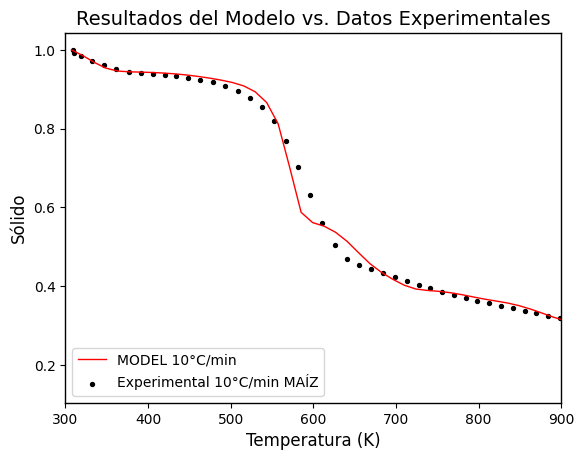

In [73]:

plt.figure(dpi=100)
#plt.figure(figsize=(6, 6))

# color del fondo
plt.gca().set_facecolor('none')

#bordes de la grafica
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Resultados del modelo
plt.xlim(300,900)
plt.plot(M3_temperaturas,M3_SOLIDO, label='MODEL 10°C/min', linewidth=1, color='red')

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 20% TALLO DE MAIZ 80%
M3_DATOS_EXPERIMENTALES10Cmin_subset = M3_TEMPERATURA_EXPERIMENTAL10[::700]
M3_FRACTION_EXPERIMENTAL10_subset = M3_FRACTION_EXPERIMENTAL10[::700]

# Datos experimentales

plt.scatter(M3_DATOS_EXPERIMENTALES10Cmin_subset, M3_FRACTION_EXPERIMENTAL10_subset, label='Experimental 10°C/min MAÍZ', c='black', marker='o', s=8)

# Etiquetas
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Sólido', fontsize=12)
plt.legend(fontsize=12)
plt.gca().legend(loc='lower left')

# Título
plt.title('Resultados del Modelo vs. Datos Experimentales', fontsize=14)
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(M3_FRACTION_EXPERIMENTAL10_subset, M3_SOLIDO)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 0.002282765496927


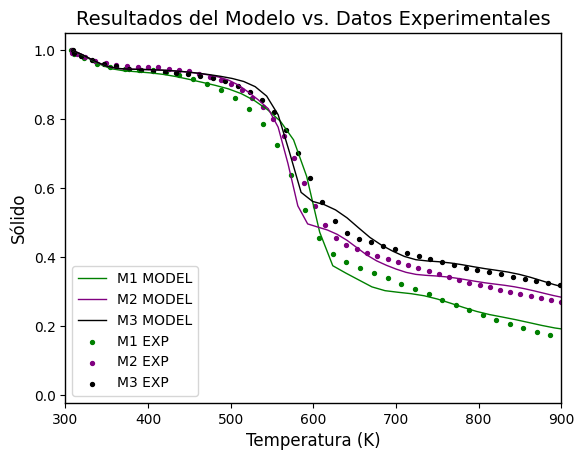

In [74]:

plt.figure(dpi=100)
#plt.figure(figsize=(6, 6))

# color del fondo
plt.gca().set_facecolor('none')

#bordes de la grafica
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Resultados del modelo
plt.xlim(300,900)

plt.plot(M1_temperaturas,M1_SOLIDO, label='M1 MODEL', linewidth=1, color='green')
plt.plot(M2_temperaturas,M2_SOLIDO, label='M2 MODEL', linewidth=1, color='purple')
plt.plot(M3_temperaturas,M3_SOLIDO, label='M3 MODEL', linewidth=1, color='black')

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 20% TALLO DE MAIZ 80%

# Datos experimentales

plt.scatter(M1_DATOS_EXPERIMENTALES10Cmin_subset, M1_FRACTION_EXPERIMENTAL10_subset, label='M1 EXP', c='green', marker='o', s=8)
plt.scatter(M2_DATOS_EXPERIMENTALES10Cmin_subset, M2_FRACTION_EXPERIMENTAL10_subset, label='M2 EXP', c='purple', marker='o', s=8)
plt.scatter(M3_DATOS_EXPERIMENTALES10Cmin_subset, M3_FRACTION_EXPERIMENTAL10_subset, label='M3 EXP', c='black', marker='o', s=8)

# Etiquetas
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Sólido', fontsize=12)
plt.legend(fontsize=12)
plt.gca().legend(loc='lower left')

# Título
plt.title('Resultados del Modelo vs. Datos Experimentales', fontsize=14)
plt.show()

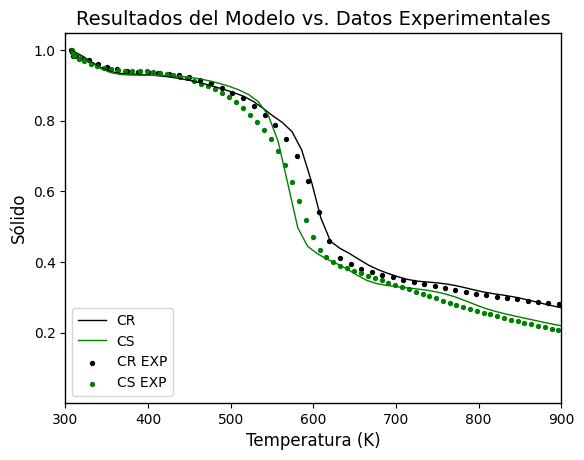

In [69]:
plt.figure(dpi=100)
#plt.figure(figsize=(5, 5))

# color del fondo
plt.gca().set_facecolor('none')

#bordes de la grafica
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['top'].set_linewidth(1)
plt.gca().spines['right'].set_linewidth(1)
plt.gca().spines['bottom'].set_linewidth(1)
plt.gca().spines['left'].set_linewidth(1)

# Limitar el eje x
plt.xlim(300, 900)

# Resultados del modelo
plt.plot(temperaturas,SOLIDO10, label='CR', linewidth=1, color='black')
plt.plot(MAIZ_temperaturas,MAIZ_SOLIDO, label='CS', linewidth=1, color='green')

# DATOS EXPERIMENTALES DE MEZCLAS RIZOMA DE YUCA 20% TALLO DE MAIZ 80%

# TEMPERATURA_EXPERIMENTAL (Tomar solo un punto cada 300)
TEMPERATURA_EXPERIMENTAL10_subset = TEMPERATURA_EXPERIMENTAL10[::200]
FRACTION_EXPERIMENTAL10_subset = FRACTION_EXPERIMENTAL10[::200]

MAIZ_TEMPERATURA_EXPERIMENTAL10_subset = MAIZ_TEMPERATURA_EXPERIMENTAL10[::400]
MAIZ_FRACTION_EXPERIMENTAL10_subset = MAIZ_FRACTION_EXPERIMENTAL10[::400]

# Datos experimentales
plt.scatter(TEMPERATURA_EXPERIMENTAL10_subset, FRACTION_EXPERIMENTAL10_subset, label='CR EXP', c='black', marker='o', s=8)
plt.scatter(MAIZ_TEMPERATURA_EXPERIMENTAL10_subset, MAIZ_FRACTION_EXPERIMENTAL10_subset, label='CS EXP', c='green', marker='o', s=8)


# Etiquetas
plt.xlabel('Temperatura (K)', fontsize=12)
plt.ylabel('Sólido', fontsize=12)
plt.legend(fontsize=12)
plt.legend(loc='lower left')

# Título
plt.title('Resultados del Modelo vs. Datos Experimentales', fontsize=14)
plt.show()
